#  M.S. Dhoni's Batting Career Performance

## Introduction

This section provides an overview of the analysis objectives and introduces the dataset.

# Overall Career Analysis of MS Dhoni

## 1. Importing Libraries and Loading the Dataset

Begin by importing necessary libraries and loading the dataset:

In [152]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df3 = pd.read_csv("data/raw data/MS_Dhoni_T20_record.csv")
df1 = pd.read_csv("data/raw data/MS_Dhoni_ODI_record.csv")
df2 = pd.read_csv("data/raw data/MS_Dhoni_Test_record.csv")
df4 = pd.read_csv("data/raw data/MS_Dhoni_IPL_record.csv")

# Print the first few rows of each dataframe to check
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number position  
0     Chattogram  12-23-2004  ODI # 2199        7  
1          Dhaka  12-26-2004  ODI # 2201        7  
2          Dhaka  12-27-2004  ODI # 2202        7  
3          Kochi  04-02-2005  ODI # 2235        7  
4  Visakhapatnam  04-05-2005  ODI # 2236        3  
  score_b1 score_b2 runs_scored balls_faced strike_rate fours sixes  \
0       30        -          30          54       55.55     6     0   
1        5      51*          56          63       88.88     6     2   
2       49       14          63     

## 2. Data Cleaning and Preparation

Prepare the data for analysis by performing the following steps:

- Remove Unnecessary Characters from 'opposition' Column:

In [153]:
def process_opposition(df):
    df['opposition'] = df['opposition'].astype(str).apply(
        lambda x: x[2:] if isinstance(x, str) else x
    )
    return df

df1 = process_opposition(df1)
df2 = process_opposition(df2)
df3 = process_opposition(df3)
df4 = process_opposition(df4)


- Extract Year from 'date' Column:

In [154]:
# Ensure 'date' is in datetime format with explicit format
df1['date'] = pd.to_datetime(df1['date'], format='mixed', dayfirst=True, errors='coerce')
df2['date'] = pd.to_datetime(df2['date'], format='mixed', dayfirst=True, errors='coerce')
df3['date'] = pd.to_datetime(df3['date'], format='mixed', dayfirst=True, errors='coerce')
df4['date'] = pd.to_datetime(df4['date'], format='mixed', dayfirst=True, errors='coerce')

# Check for NaT values in 'date' column and fill or drop them as needed
print(df1[df1['date'].isna()])
print(df2[df2['date'].isna()])
print(df3[df3['date'].isna()])
print(df4[df4['date'].isna()])

# Now create the 'year' column
df1['year'] = df1['date'].dt.year
df2['year'] = df2['date'].dt.year
df3['year'] = df3['date'].dt.year
df4['year'] = df4['date'].dt.year

# Ensure 'year' is an integer, filling NaNs with 0 if necessary
df1['year'] = df1['year'].fillna(0).astype(int)
df2['year'] = df2['year'].fillna(0).astype(int)
df3['year'] = df3['year'].fillna(0).astype(int)
df4['year'] = df4['year'].fillna(0).astype(int)


Empty DataFrame
Columns: [score, runs_scored, balls_faced, strike_rate, fours, sixes, opposition, ground, date, odi_number, position]
Index: []
Empty DataFrame
Columns: [score_b1, score_b2, runs_scored, balls_faced, strike_rate, fours, sixes, opposition, ground, date, test_number, position]
Index: []
Empty DataFrame
Columns: [score, runs_scored, balls_faced, strike_rate, fours, sixes, ground, date, T20_number, opposition, position]
Index: []
Empty DataFrame
Columns: [score, runs_scored, balls_faced, strike_rate, fours, sixes, date, opposition, Out, position]
Index: []


- create a column indicating whether Dhoni was not out in that innings or not:

In [155]:
#  creating a feature for being not out
df1['score'] = df1['score'].astype(str)
df2['score_b1'] = df2['score_b1'].astype(str)
df3['score'] = df3['score'].astype(str)
df4['score'] = df4['score'].astype(str)

# Create 'not_out' column
df1['not_out'] = np.where(df1['score'].str.endswith('*'), 1, 0)
df3['not_out'] = np.where(df3['score'].str.endswith('*'), 1, 0)
df4['not_out'] = np.where(df4['score'].str.endswith('*'), 1, 0)

# Create 'not_out' for both score_b1 and score_b2 in df2
df2['not_out_b1'] = np.where(df2['score_b1'].str.endswith('*'), 1, 0)
df2['not_out_b2'] = np.where(df2['score_b2'].str.endswith('*'), 1, 0)

- Drop Unnecessary Columns and Filter Data:

In [156]:
# Drop 'odi_number' column
df1.drop(columns='odi_number', inplace=True)

# Drop 'test_number' column
df2.drop(columns='test_number', inplace=True)

# Drop 'T20_number' column
df3.drop(columns='T20_number', inplace=True)

# Drop 'OUT' column
df4.drop(columns='Out', inplace=True)

# Dropping innings where Dhoni did not bat and storing in new DataFrames
df1_new = df1.loc[(df1['score'] != 'DFB') & (df1['score'] != 'TDFB'), 'runs_scored':]

df2_new = df2.loc[
    ((df2['score_b1'] != 'DFB') & (df2['score_b1'] != 'TDFB')) | 
    ((df2['score_b2'] != 'DFB') & (df2['score_b2'] != 'TDFB')),
    'runs_scored':  # Assuming 'runs_scored' is a common column
]

df3_new = df3.loc[(df3['score'] != 'DFB') & (df3['score'] != 'TDFB'), 'runs_scored':]
df4_new = df4.loc[(df4['score'] != 'DFB'), 'runs_scored':]

# Ensure the 'date' column is in datetime format in df3
df3['date'] = pd.to_datetime(df3['date'], errors='coerce')  # Convert to datetime, invalid parsing will be set to NaT

# Check for NaT or NaN values and drop them if necessary in df3
df3 = df3.dropna(subset=['date'])



# Convert data types
for df in [df1_new, df2_new, df3_new, df4_new]:
    cols = ['runs_scored', 'balls_faced', 'strike_rate', 'fours', 'sixes']  # List all relevant columns
    df[cols] = df[cols].replace('-', np.nan)  # Convert '-' to NaN
    df.dropna(subset=cols, inplace=True)  # Drop rows with NaN
    df['runs_scored'] = df['runs_scored'].astype(int)
    df['balls_faced'] = df['balls_faced'].astype(int)
    df['strike_rate'] = df['strike_rate'].astype(float)
    df['fours'] = df['fours'].astype(int)
    df['sixes'] = df['sixes'].astype(int)


# Save each processed DataFrame as a CSV to a specific location
df1_new.to_csv('data/filtered data/processed_odi_data.csv', index=False)
df2_new.to_csv('data/filtered data/processed_test_data.csv', index=False)
df3_new.to_csv('data/filtered data/processed_t20_data.csv', index=False)
df4_new.to_csv('data/filtered data/processed_ipl_data.csv', index=False)


## 3. Career Statistics

Calculate and display key career statistics for ODI Matches 

In [157]:

first_match_date_df1 = df1['date'].dt.date.min().strftime('%B %d, %Y')  # First match
print('First match (df1):', first_match_date_df1)
last_match_date_df1 = df1['date'].dt.date.max().strftime('%B %d, %Y')  # Last match
print('Last match (df1):', last_match_date_df1)
number_of_matches_df1 = df1.shape[0]  # Number of matches played in career
print('Number of matches played (df1):', number_of_matches_df1)
number_of_inns_df1 = df1_new.shape[0]  # Number of innings
print('Number of innings played (df1):', number_of_inns_df1)
not_outs_df1 = df1_new['not_out'].sum()  # Number of not outs in career
print('Not outs (df1):', not_outs_df1)
runs_scored_df1 = df1_new['runs_scored'].sum()  # Runs scored in career
print('Runs scored in career (df1):', runs_scored_df1)
balls_faced_df1 = df1_new['balls_faced'].sum()  # Balls faced in career
print('Balls faced in career (df1):', balls_faced_df1)
career_sr_df1 = (runs_scored_df1 / balls_faced_df1) * 100  # Career strike rate
print('Career strike rate (df1): {:.2f}'.format(career_sr_df1))
career_avg_df1 = (runs_scored_df1 / (number_of_inns_df1 - not_outs_df1))  # Career average
print('Career average (df1): {:.2f}'.format(career_avg_df1))
highest_score_date_df1 = df1_new.loc[df1_new.runs_scored == df1_new.runs_scored.max(), 'date'].values[0]
highest_score_df1 = df1.loc[df1.date == highest_score_date_df1, 'score'].values[0]  # Highest score
print('Highest score in career (df1):', highest_score_df1)
hundreds_df1 = df1_new.loc[df1_new['runs_scored'] >= 100].shape[0]  # Number of 100s
print('Number of 100s (df1):', hundreds_df1)
fifties_df1 = df1_new.loc[(df1_new['runs_scored'] >= 50) & (df1_new['runs_scored'] < 100)].shape[0]  # Number of 50s
print('Number of 50s (df1):', fifties_df1)
fours_df1 = df1_new['fours'].sum()  # Number of fours in career
print('Number of 4s (df1):', fours_df1)
sixes_df1 = df1_new['sixes'].sum()  # Number of sixes in career
print('Number of 6s (df1):', sixes_df1)



First match (df1): December 23, 2004
Last match (df1): December 01, 2019
Number of matches played (df1): 350
Number of innings played (df1): 297
Not outs (df1): 84
Runs scored in career (df1): 10773
Balls faced in career (df1): 12303
Career strike rate (df1): 87.56
Career average (df1): 50.58
Highest score in career (df1): 183*
Number of 100s (df1): 10
Number of 50s (df1): 73
Number of 4s (df1): 826
Number of 6s (df1): 229


Calculate and display key career statistics for Test Matches 

In [158]:
first_match_date_df2 = df2['date'].dt.date.min().strftime('%B %d, %Y')  # First match
print('First match (df2):', first_match_date_df2)
last_match_date_df2 = df2['date'].dt.date.max().strftime('%B %d, %Y')  # Last match
print('Last match (df2):', last_match_date_df2)
number_of_matches_df2 = df2.shape[0]  # Number of matches played in career
print('Number of matches played (df2):', number_of_matches_df2)
number_of_inns_df2 = df2_new.shape[0]  # Number of innings
print('Number of innings played (df2):', number_of_inns_df2)

# Check if 'not_out_b1' and 'not_out_b2' columns exist
if 'not_out_b1' in df2.columns and 'not_out_b2' in df2.columns:
    not_outs_b1_df2 = df2['not_out_b1'].sum()  # Number of not outs in score_b1
    not_outs_b2_df2 = df2['not_out_b2'].sum()  # Number of not outs in score_b2
    total_not_outs_df2 = not_outs_b1_df2 + not_outs_b2_df2  # Total not outs in career
    print('Not outs in score_b1 (df2):', not_outs_b1_df2)
    print('Not outs in score_b2 (df2):', not_outs_b2_df2)
    print('Total not outs (df2):', total_not_outs_df2)  # Sum of not outs in b1 and b2
else:
    print('No "not_out_b1" or "not_out_b2" column found in df2.')

runs_scored_df2 = df2_new['runs_scored'].sum()  # Runs scored in career
print('Runs scored in career (df2):', runs_scored_df2)
balls_faced_df2 = df2_new['balls_faced'].sum()  # Balls faced in career
print('Balls faced in career (df2):', balls_faced_df2)
career_sr_df2 = (runs_scored_df2 / balls_faced_df2) * 100  # Career strike rate
print('Career strike rate (df2): {:.2f}'.format(career_sr_df2))
career_avg_df2 = (runs_scored_df2 / (number_of_inns_df2 - total_not_outs_df2)) if 'not_out' in df2_new.columns else (runs_scored_df2 / number_of_inns_df2)  # Career average
print('Career average (df2): {:.2f}'.format(career_avg_df2))
highest_score_date_df2 = df2_new.loc[df2_new.runs_scored == df2_new.runs_scored.max(), 'date'].values[0]
highest_score_df2 = df2.loc[df2.date == highest_score_date_df2, 'score_b1'].values[0]  # Highest score
print('Highest score in career (df2):', highest_score_df2)
hundreds_df2 = df2_new.loc[df2_new['runs_scored'] >= 100].shape[0]  # Number of 100s
print('Number of 100s (df2):', hundreds_df2)
fifties_df2 = df2_new.loc[(df2_new['runs_scored'] >= 50) & (df2_new['runs_scored'] < 100)].shape[0]  # Number of 50s
print('Number of 50s (df2):', fifties_df2)
fours_df2 = df2_new['fours'].sum()  # Number of fours in career
print('Number of 4s (df2):', fours_df2)
sixes_df2 = df2_new['sixes'].sum()  # Number of sixes in career
print('Number of 6s (df2):', sixes_df2)



First match (df2): February 12, 2005
Last match (df2): December 26, 2014
Number of matches played (df2): 90
Number of innings played (df2): 89
Not outs in score_b1 (df2): 5
Not outs in score_b2 (df2): 11
Total not outs (df2): 16
Runs scored in career (df2): 4876
Balls faced in career (df2): 8249
Career strike rate (df2): 59.11
Career average (df2): 54.79
Highest score in career (df2): 224
Number of 100s (df2): 13
Number of 50s (df2): 27
Number of 4s (df2): 544
Number of 6s (df2): 78


Calculate and display key career statistics for T20 Matches 

In [159]:

first_match_date_df3 = df3['date'].dt.date.min().strftime('%B %d, %Y')  # First match
print('First match (df3):', first_match_date_df3)
last_match_date_df3 = df3['date'].dt.date.max().strftime('%B %d, %Y')  # Last match
print('Last match (df3):', last_match_date_df3)
number_of_matches_df3 = df3.shape[0]  # Number of matches played in career
print('Number of matches played (df3):', number_of_matches_df3)
number_of_inns_df3 = df3_new.shape[0]  # Number of innings
print('Number of innings played (df3):', number_of_inns_df3)
not_outs_df3 = df3_new['not_out'].sum()  # Number of not outs in career
print('Not outs (df3):', not_outs_df3)
runs_scored_df3 = df3_new['runs_scored'].sum()  # Runs scored in career
print('Runs scored in career (df3):', runs_scored_df3)
balls_faced_df3 = df3_new['balls_faced'].sum()  # Balls faced in career
print('Balls faced in career (df3):', balls_faced_df3)
career_sr_df3 = (runs_scored_df3 / balls_faced_df3) * 100  # Career strike rate
print('Career strike rate (df3): {:.2f}'.format(career_sr_df3))
career_avg_df3 = (runs_scored_df3 / (number_of_inns_df3 - not_outs_df3))  # Career average
print('Career average (df3): {:.2f}'.format(career_avg_df3))
highest_score_date_df3 = df3_new.loc[df3_new.runs_scored == df3_new.runs_scored.max(), 'date'].values[0]
highest_score_df3 = df3.loc[df3.date == highest_score_date_df3, 'score'].values[0]  # Highest score
print('Highest score in career (df3):', highest_score_df3)
hundreds_df3 = df3_new.loc[df3_new['runs_scored'] >= 100].shape[0]  # Number of 100s
print('Number of 100s (df3):', hundreds_df3)
fifties_df3 = df3_new.loc[(df3_new['runs_scored'] >= 50) & (df3_new['runs_scored'] < 100)].shape[0]  # Number of 50s
print('Number of 50s (df3):', fifties_df3)
fours_df3 = df3_new['fours'].sum()  # Number of fours in career
print('Number of 4s (df3):', fours_df3)
sixes_df3 = df3_new['sixes'].sum()  # Number of sixes in career
print('Number of 6s (df3):', sixes_df3)



First match (df3): January 12, 2006
Last match (df3): October 02, 2019
Number of matches played (df3): 98
Number of innings played (df3): 84
Not outs (df3): 41
Runs scored in career (df3): 1617
Balls faced in career (df3): 1282
Career strike rate (df3): 126.13
Career average (df3): 37.60
Highest score in career (df3): 56
Number of 100s (df3): 0
Number of 50s (df3): 2
Number of 4s (df3): 116
Number of 6s (df3): 52


Calculate and display key career statistics for IPL Matches 

In [160]:

first_match_date_df4 = df4['date'].dt.date.min().strftime('%B %d, %Y')  # First match
print('First match (df4):', first_match_date_df4)
last_match_date_df4 = df4['date'].dt.date.max().strftime('%B %d, %Y')  # Last match
print('Last match (df4):', last_match_date_df4)
number_of_matches_df4 = df4.shape[0]  # Number of matches played in career
print('Number of matches played (df4):', number_of_matches_df4)
number_of_inns_df4 = df4_new.shape[0]  # Number of innings
print('Number of innings played (df4):', number_of_inns_df4)
not_outs_df4 = df4_new['not_out'].sum()  # Number of not outs in career
print('Not outs (df4):', not_outs_df4)
runs_scored_df4 = df4_new['runs_scored'].sum()  # Runs scored in career
print('Runs scored in career (df4):', runs_scored_df4)
balls_faced_df4 = df4_new['balls_faced'].sum()  # Balls faced in career
print('Balls faced in career (df4):', balls_faced_df4)
career_sr_df4 = (runs_scored_df4 / balls_faced_df4) * 100  # Career strike rate
print('Career strike rate (df4): {:.2f}'.format(career_sr_df4))
career_avg_df4 = (runs_scored_df4 / (number_of_inns_df4 - not_outs_df4))  # Career average
print('Career average (df4): {:.2f}'.format(career_avg_df4))
highest_score_date_df4 = df4_new.loc[df4_new.runs_scored == df4_new.runs_scored.max(), 'date'].values[0]
highest_score_df4 = df4.loc[df4.date == highest_score_date_df4, 'score'].values[0]  # Highest score
print('Highest score in career (df4):', highest_score_df4)
hundreds_df4 = df4_new.loc[df4_new['runs_scored'] >= 100].shape[0]  # Number of 100s
print('Number of 100s (df4):', hundreds_df4)
fifties_df4 = df4_new.loc[(df4_new['runs_scored'] >= 50) & (df4_new['runs_scored'] < 100)].shape[0]  # Number of 50s
print('Number of 50s (df4):', fifties_df4)
fours_df4 = df4_new['fours'].sum()  # Number of fours in career
print('Number of 4s (df4):', fours_df4)
sixes_df4 = df4_new['sixes'].sum()  # Number of sixes in career
print('Number of 6s (df4):', sixes_df4)


First match (df4): January 06, 2008
Last match (df4): December 05, 2024
Number of matches played (df4): 265
Number of innings played (df4): 228
Not outs (df4): 93
Runs scored in career (df4): 5539
Balls faced in career (df4): 3812
Career strike rate (df4): 145.30
Career average (df4): 41.03
Highest score in career (df4): 328
Number of 100s (df4): 1
Number of 50s (df4): 24
Number of 4s (df4): 363
Number of 6s (df4): 252


## 4. Data Visualization

Visualize performance metrics using plots:

- Matches he has played against different oppositions:

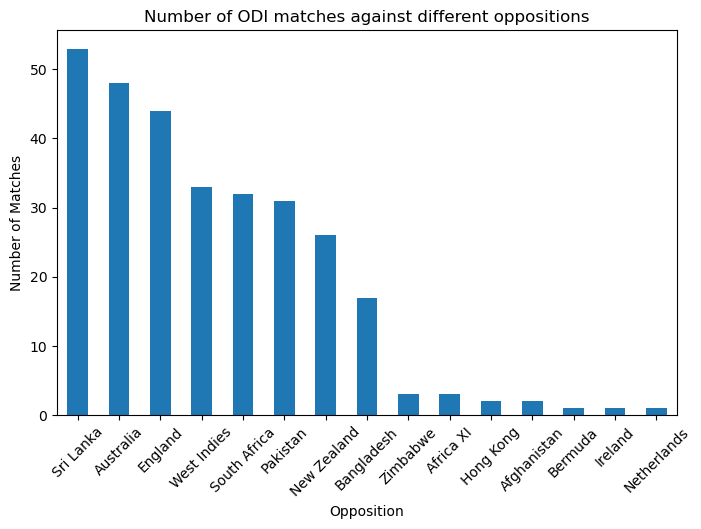

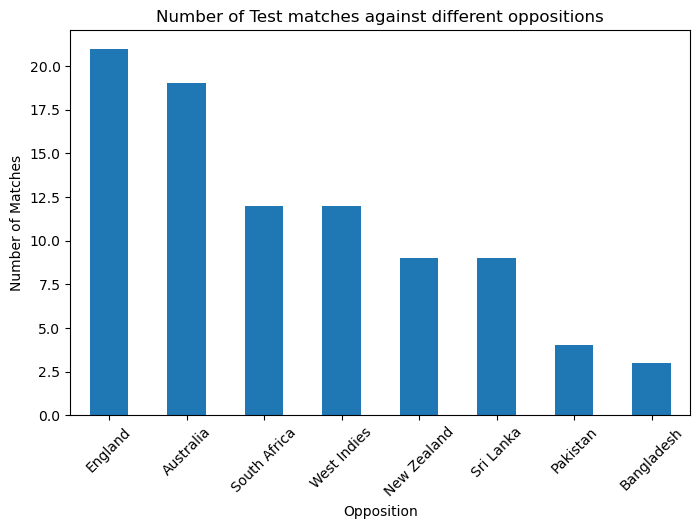

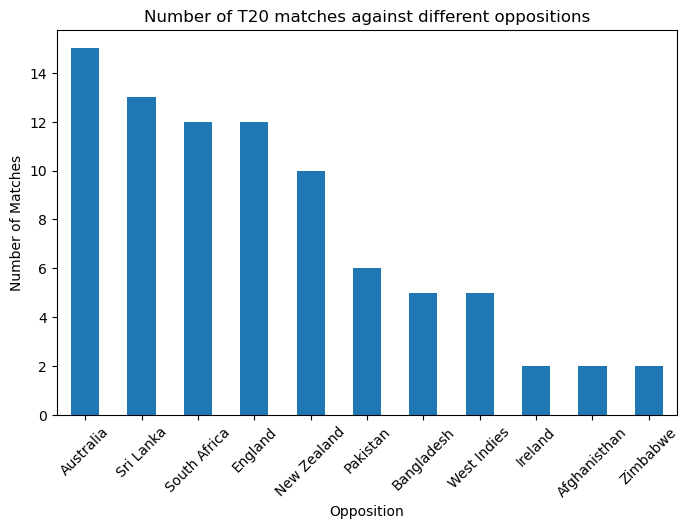

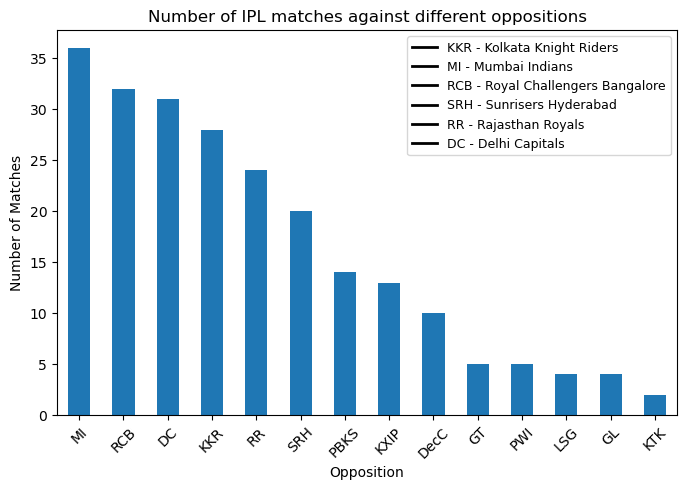

In [ ]:
# Directory for saving plots
save_dir = "build/Matches played against different oppositions"
os.makedirs(save_dir, exist_ok=True)

# DataFrames and titles for different formats
match_formats = {
    "ODI": df1,
    "Test": df2,
    "T20": df3,
    "IPL": df4
}

# Define IPL team names explicitly for the legend
ipl_teams = {
    "KKR": "Kolkata Knight Riders",
    "MI": "Mumbai Indians",
    "RCB": "Royal Challengers Bangalore",
    "SRH": "Sunrisers Hyderabad",
    "RR": "Rajasthan Royals",
    "DC": "Delhi Capitals"
}

# Generate and save plots for each match format
for match_type, df in match_formats.items():
    plt.figure(figsize=(8, 5))

    # Bar plot of matches played against different teams
    ax = df["opposition"].value_counts().plot(kind="bar", title=f"Number of {match_type} matches against different oppositions")
    
    plt.xlabel("Opposition")
    plt.ylabel("Number of Matches")
    
    # Reduce font size for better visibility
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add legend only for IPL teams
    if match_type == "IPL":
        handles = [plt.Line2D([0], [0], color='black', lw=2, label=f"{short} - {full}") 
                   for short, full in ipl_teams.items()]
        plt.legend(handles=handles, loc="upper right", fontsize=9, frameon=True)

    # Save the plot
    save_path = os.path.join(save_dir, f"Number of {match_type} matches against different oppositions.png")
    plt.savefig(save_path, bbox_inches="tight")
    
    plt.show()


-  Runs scored against different oppositions.

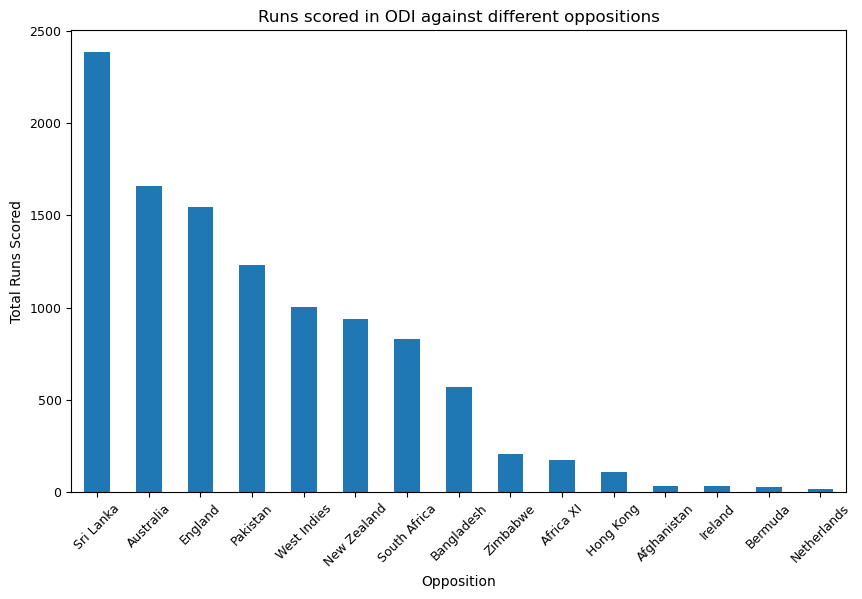

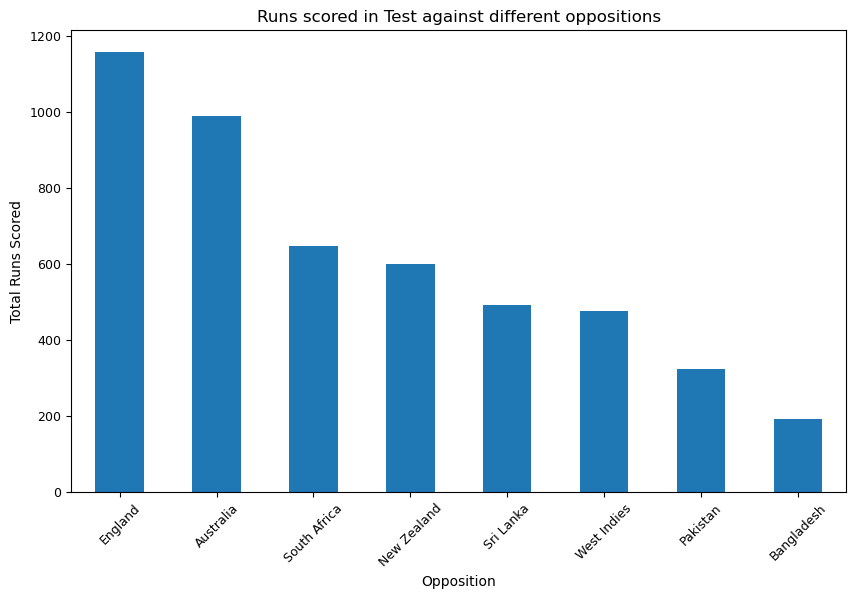

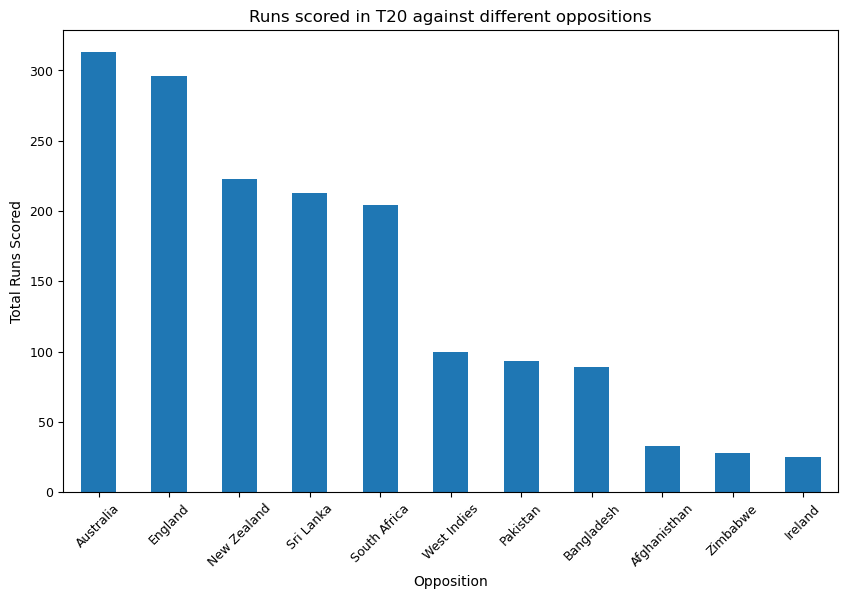

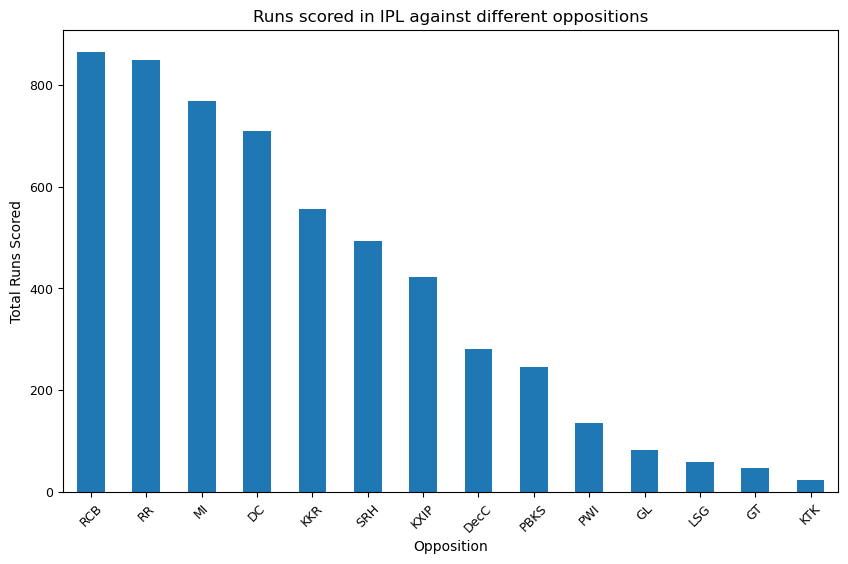

In [182]:
# Ensure the directory exists
save_dir = "build/Runs scored against different oppositions"
os.makedirs(save_dir, exist_ok=True)

# Define DataFrames for different formats
match_formats = {
    "ODI": df1,
    "Test": df2,
    "T20": df3,
    "IPL": df4
}

# Define IPL team names 
ipl_teams = {
    "KKR": "Kolkata Knight Riders",
    "MI": "Mumbai Indians",
    "RCB": "Royal Challengers Bangalore",
    "SRH": "Sunrisers Hyderabad",
    "RR": "Rajasthan Royals",
    "DC": "Delhi Capitals"
}

# Generate and save plots
for match_type, df in match_formats.items():
    plt.figure(figsize=(10, 6))

    # Ensure 'runs_scored' is numeric
    df["runs_scored"] = pd.to_numeric(df["runs_scored"], errors="coerce")

    # Aggregate runs scored against each opposition
    df_grouped = df.groupby("opposition")["runs_scored"].sum().sort_values(ascending=False)

    if df_grouped.empty:  # Skip if no valid data
        print(f"Skipping {match_type} - No numeric data found in 'runs_scored'")
        continue

    df_grouped.plot(kind="bar", title=f"Runs scored in {match_type} against different oppositions")

    plt.xlabel("Opposition", fontsize=10)
    plt.ylabel("Total Runs Scored", fontsize=10)
    plt.xticks(rotation=45, fontsize=9)
    plt.yticks(fontsize=9)

    
    # Save file with correct extension
    file_path = os.path.join(save_dir, f"Runs_scored_in_{match_type}_against_different_oppositions.png")
    plt.savefig(file_path, bbox_inches="tight")

    plt.show()


- Batting average against each team.

In [163]:
# Function to process and calculate averages
def calculate_average_by_opposition(df, major_teams=None):
    """
    Calculates the average runs scored by a player against different oppositions.
    
    Parameters:
    df (DataFrame): Input DataFrame containing data for runs, oppositions, and other stats.
    major_teams (list): List of teams to filter the results. If None, includes all teams.
    
    Returns:
    DataFrame: DataFrame with average runs per opposition.
    """
    # Group by opposition to get runs scored, innings, and not outs
    runs_scored_by_opposition = df.groupby('opposition')['runs_scored'].sum().reset_index()
    innings_by_opposition = df.groupby('opposition')['date'].count().reset_index()

    # Handle 'not_out' column dynamically
    if 'not_out' in df.columns:
        not_outs_by_opposition = df.groupby('opposition')['not_out'].sum().reset_index()
    else:
        not_outs_by_opposition = pd.DataFrame({'opposition': [], 'not_out': []})

    # Ensure all columns are numeric
    runs_scored_by_opposition['runs_scored'] = pd.to_numeric(runs_scored_by_opposition['runs_scored'], errors='coerce')
    innings_by_opposition['date'] = pd.to_numeric(innings_by_opposition['date'], errors='coerce')
    not_outs_by_opposition['not_out'] = pd.to_numeric(not_outs_by_opposition['not_out'], errors='coerce')

    # Merge dataframes
    temp_df = pd.merge(runs_scored_by_opposition, innings_by_opposition, on='opposition')
    average_by_opposition = pd.merge(temp_df, not_outs_by_opposition, on='opposition', how='left').fillna(0)

    # Rename columns for clarity
    average_by_opposition.rename(columns={'date': 'innings'}, inplace=True)

    # Calculate effective innings and average
    average_by_opposition['eff_num_of_inns'] = average_by_opposition['innings'] - average_by_opposition['not_out']
    average_by_opposition['average'] = average_by_opposition['runs_scored'] / average_by_opposition['eff_num_of_inns']

    # Replace infinite values (for players with all not outs) with NaN
    average_by_opposition.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Filter for major teams if provided
    if major_teams:
        average_by_opposition_major = average_by_opposition.loc[average_by_opposition['opposition'].isin(major_teams)]
    else:
        average_by_opposition_major = average_by_opposition

    return average_by_opposition, average_by_opposition_major


# Define major teams for filtering
major_nations = ['Australia', 'England', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']
major_ipl_teams = ['KKR', 'MI', 'RCB', 'SRH', 'RR', 'DC']

# Assuming df1_new, df2_new, df3_new, and df4_new are already defined
average_odi, average_odi_major = calculate_average_by_opposition(df1_new, major_nations)
average_test, average_test_major = calculate_average_by_opposition(df2_new, major_nations)
average_t20, average_t20_major = calculate_average_by_opposition(df3_new, major_nations)
average_ipl, average_ipl_major = calculate_average_by_opposition(df4_new, major_ipl_teams)

# Display results
print('Average by opposition (ODI) for major nations:\n', average_odi_major)
print('Average by opposition (Test) for major nations:\n', average_test_major)
print('Average by opposition (T20) for major nations:\n', average_t20_major)
print('Average by opposition (IPL) for major teams:\n', average_ipl_major)

Average by opposition (ODI) for major nations:
       opposition  runs_scored  innings  not_out  eff_num_of_inns    average
2      Australia         1660       48       11               37  44.864865
5        England         1546       44       11               33  46.848485
9    New Zealand          940       26        7               19  49.473684
10      Pakistan         1231       31        8               23  53.521739
11  South Africa          830       32        6               26  31.923077
12     Sri Lanka         2383       53       16               37  64.405405
13   West Indies         1005       33       15               18  55.833333
Average by opposition (Test) for major nations:
      opposition  runs_scored  innings  not_out  eff_num_of_inns    average
0     Australia          990       19      0.0             19.0  52.105263
2       England         1157       21      0.0             21.0  55.095238
3   New Zealand          599        9      0.0              9.0  66.55

In [164]:
# Function to calculate overall career average
def calculate_career_average(df):
    """
    Calculate the overall batting average for a given dataset.
    """
    total_runs = df["runs_scored"].sum()
    total_innings = df["date"].count()
    
    # Handle not_out column dynamically
    if "not_out" in df.columns:
        total_not_outs = df["not_out"].sum()
    else:
        total_not_outs = 0
    
    effective_innings = total_innings - total_not_outs
    
    # Avoid division by zero
    career_average = total_runs / effective_innings if effective_innings > 0 else None
    
    return total_runs, total_innings, total_not_outs, effective_innings, career_average

# Calculate career averages for each format
odi_stats = calculate_career_average(df1_new)  # ODI data
test_stats = calculate_career_average(df2_new)  # Test data
t20_stats = calculate_career_average(df3_new)  # T20 data
ipl_stats = calculate_career_average(df4_new)  # IPL data

# Print the career averages
print(f"Career Average (ODI): Runs={odi_stats[0]}, Inns={odi_stats[1]}, NO={odi_stats[2]}, Eff.Inns={odi_stats[3]}, Avg={odi_stats[4]:.2f}")
print(f"Career Average (Test): Runs={test_stats[0]}, Inns={test_stats[1]}, NO={test_stats[2]}, Eff.Inns={test_stats[3]}, Avg={test_stats[4]:.2f}")
print(f"Career Average (T20): Runs={t20_stats[0]}, Inns={t20_stats[1]}, NO={t20_stats[2]}, Eff.Inns={t20_stats[3]}, Avg={t20_stats[4]:.2f}")
print(f"Career Average (IPL): Runs={ipl_stats[0]}, Inns={ipl_stats[1]}, NO={ipl_stats[2]}, Eff.Inns={ipl_stats[3]}, Avg={ipl_stats[4]:.2f}")


Career Average (ODI): Runs=10773, Inns=297, NO=84, Eff.Inns=213, Avg=50.58
Career Average (Test): Runs=4876, Inns=89, NO=0, Eff.Inns=89, Avg=54.79
Career Average (T20): Runs=1617, Inns=84, NO=41, Eff.Inns=43, Avg=37.60
Career Average (IPL): Runs=5539, Inns=228, NO=93, Eff.Inns=135, Avg=41.03


plotting 


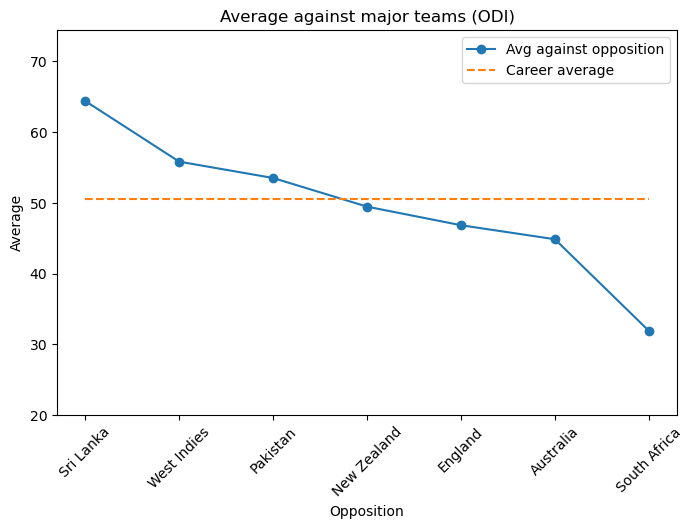

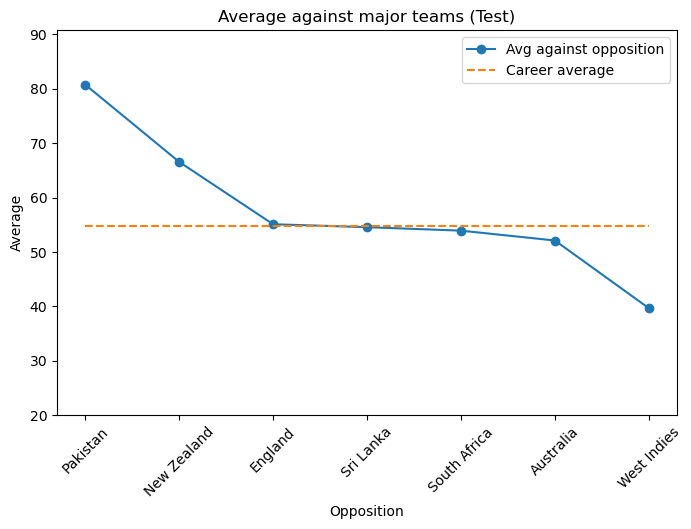

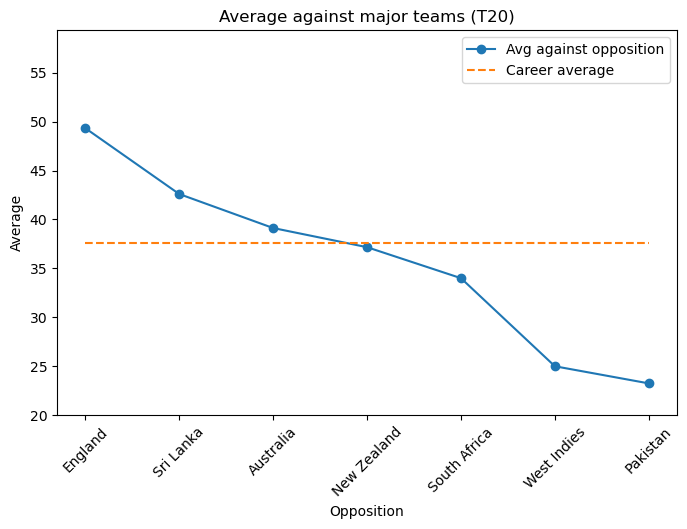

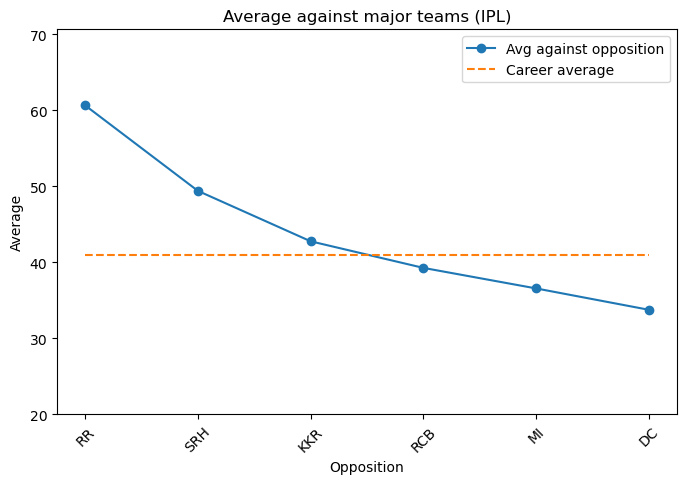

In [165]:
# Career averages 
career_avg_odi = 50.58  # Career average for ODI
career_avg_test = 54.79  # Career average for Test
career_avg_t20 = 37.60  # Career average for T20
career_avg_ipl = 41.03  # Career average for IPL

# Ensure the directory exists
save_dir = "build/Average against Major Teams"
os.makedirs(save_dir, exist_ok=True)

# Function to plot and save averages with sorting
def plot_averages(average_df, career_avg, teams, title, filename):
    if not average_df.empty:
        # Sort the data by average in descending order
        average_df_sorted = average_df.sort_values(by='average', ascending=False)

        plt.figure(figsize=(8, 5))
        plt.plot(average_df_sorted['average'].values, marker='o', label='Avg against opposition')
        plt.plot([career_avg] * len(average_df_sorted), '--', label='Career average')
        plt.title(title)
        
        # Plotting with sorted opposition names
        plt.xticks(range(len(average_df_sorted)), average_df_sorted['opposition'], rotation=45)
        plt.ylim(20, max(average_df_sorted['average'].max() + 10, career_avg + 10))
        plt.xlabel('Opposition')
        plt.ylabel('Average')
        plt.legend()

        # Save file
        file_path = os.path.join(save_dir, filename)
        plt.savefig(file_path, bbox_inches="tight")
    else:
        print(f"Warning: No data available to plot for {title}")

# Plot and save for each format
plot_averages(average_odi_major, career_avg_odi, major_nations, 'Average against major teams (ODI)', 'ODI_Average.png')
plot_averages(average_test_major, career_avg_test, major_nations, 'Average against major teams (Test)', 'Test_Average.png')
plot_averages(average_t20_major, career_avg_t20, major_nations, 'Average against major teams (T20)', 'T20_Average.png')
plot_averages(average_ipl_major, career_avg_ipl, major_ipl_teams, 'Average against major teams (IPL)', 'IPL_Average.png')

plt.show()


-  Matches he has played each year after Debut

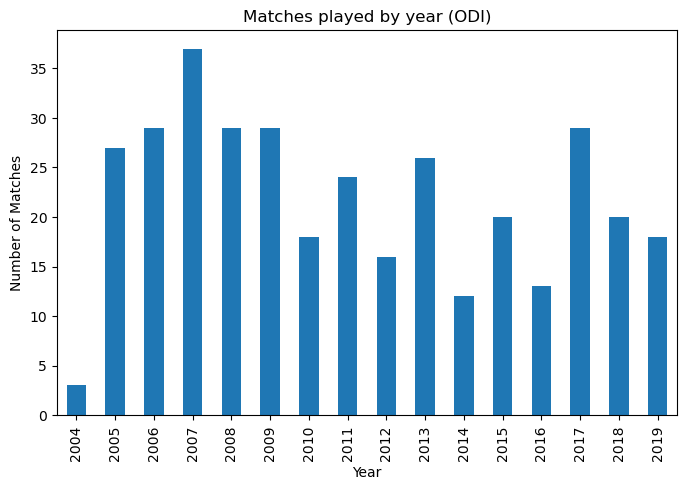

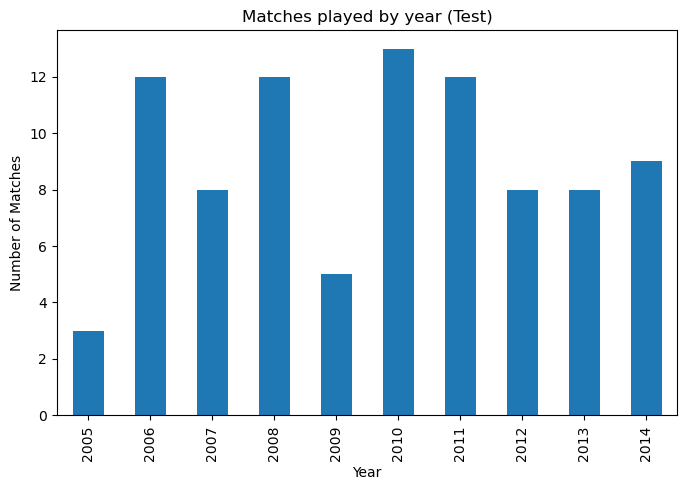

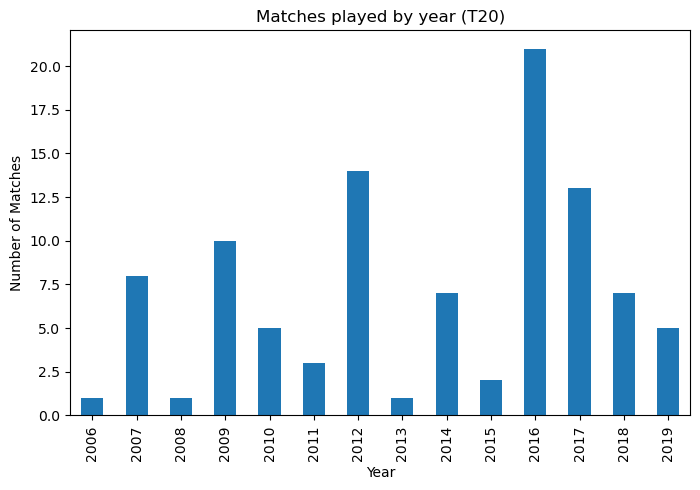

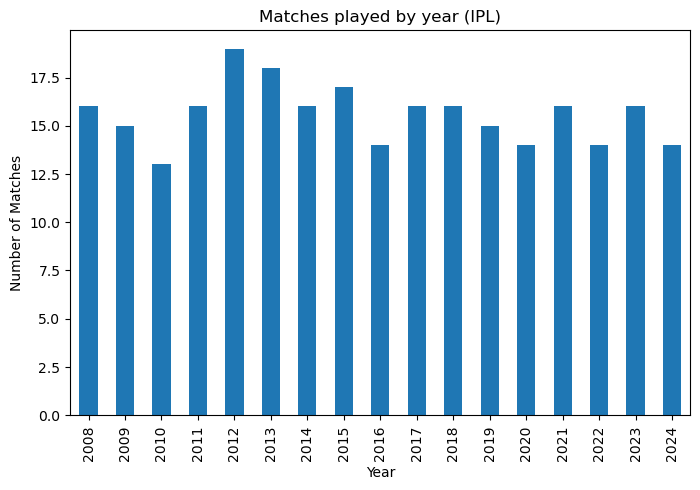

In [166]:
def save_and_show_plot(dataframe, title, filename):
    """Generate, save, and display a bar plot for matches played by year."""
    plt.figure(figsize=(8, 5))
    dataframe["year"].value_counts().sort_index().plot(kind="bar", title=title)
    plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    plt.xlabel("Year")
    plt.ylabel("Number of Matches")
    
    filepath = os.path.join(output_dir, filename)  # Correct variable name
    plt.savefig(filepath, bbox_inches="tight")  # Corrected variable name
    plt.show()  # Display the plot
    plt.close()


# Ensure the directory exists
output_dir = "build/Matches played by Year"
os.makedirs(output_dir, exist_ok=True)

# Generate, save, and show plots
save_and_show_plot(df1, "Matches played by year (ODI)", "ODI_Matches.png")
save_and_show_plot(df2, "Matches played by year (Test)", "Test_Matches.png")
save_and_show_plot(df3, "Matches played by year (T20)", "T20_Matches.png")
save_and_show_plot(df4, "Matches played by year (IPL)", "IPL_Matches.png")


- Runs Scored every Years:

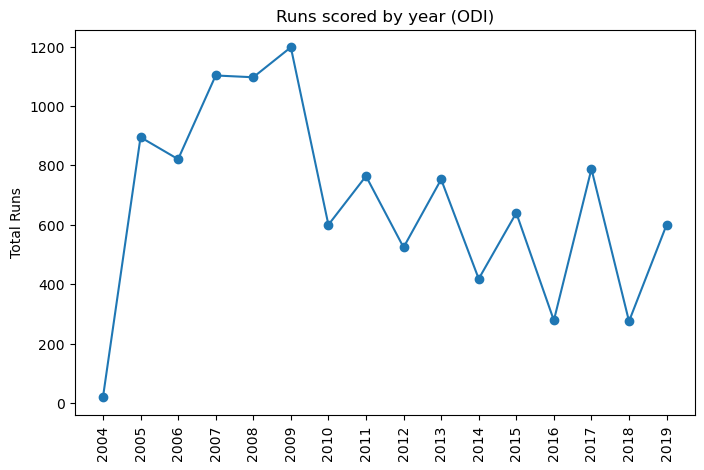

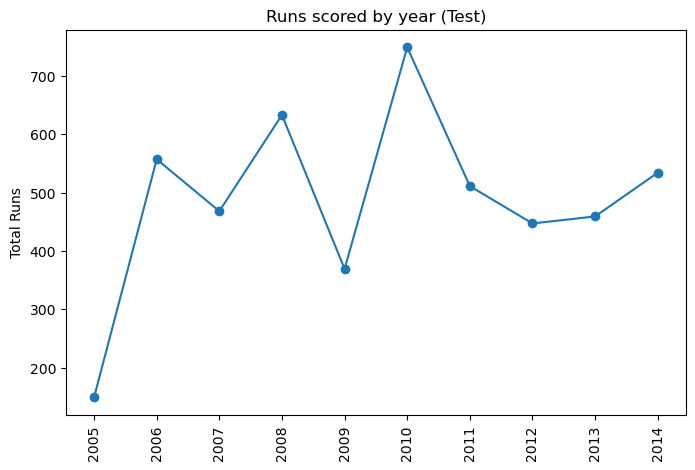

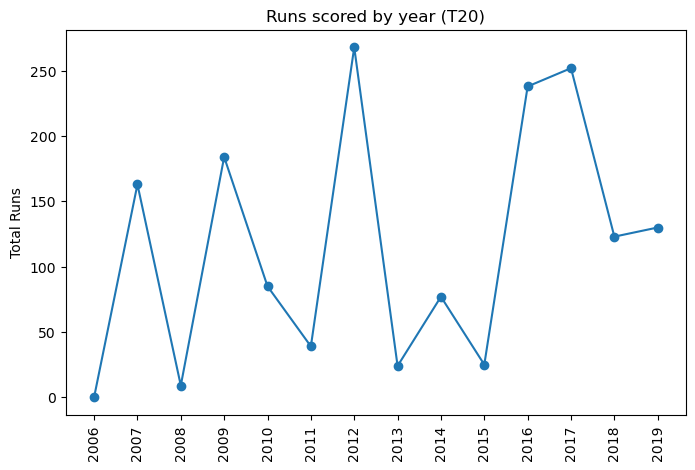

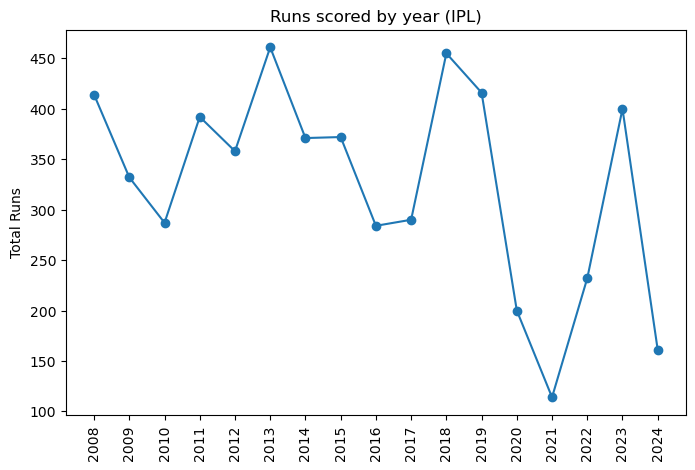

In [167]:
def save_and_show_plot(dataframe, title, filename):
    """Generate, save, and display a line plot for runs scored by year."""
    plt.figure(figsize=(8, 5))
    dataframe.groupby("year")["runs_scored"].sum().plot(kind="line", marker="o", title=title)
    
    years = dataframe["year"].unique().tolist()
    plt.xticks(years, rotation=90)  # Rotate x-axis labels vertically
    plt.xlabel(None)
    plt.ylabel("Total Runs")
    
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()  # Display the plot
    plt.close()


# Ensure the directory exists
output_dir = "build/Runs scored by year"
os.makedirs(output_dir, exist_ok=True)

# Generate, save, and show plots
save_and_show_plot(df1_new, "Runs scored by year (ODI)", "ODI_Runs.png")
save_and_show_plot(df2_new, "Runs scored by year (Test)", "Test_Runs.png")
save_and_show_plot(df3_new, "Runs scored by year (T20)", "T20_Runs.png")
save_and_show_plot(df4_new, "Runs scored by year (IPL)", "IPL_Runs.png")

- Career batting average progression by innings

In [168]:
# For ODI Matches
df1_new.reset_index(drop=True, inplace=True)

career_average_df1 = pd.DataFrame()
career_average_df1['runs_scored_in_career'] = df1_new['runs_scored'].cumsum()
career_average_df1['innings'] = df1_new.index.tolist()
career_average_df1['innings'] = career_average_df1['innings'].apply(lambda x: x + 1)
career_average_df1['not_outs_in_career'] = df1_new['not_out'].cumsum()
career_average_df1['eff_num_of_inns'] = career_average_df1['innings'] - career_average_df1['not_outs_in_career']
career_average_df1['average'] = career_average_df1['runs_scored_in_career'] / career_average_df1['eff_num_of_inns']

# For Test Matches
df2_new.reset_index(drop=True, inplace=True)

career_average_df2 = pd.DataFrame()
career_average_df2['runs_scored_in_career'] = df2_new['runs_scored'].cumsum()
career_average_df2['innings'] = df2_new.index.tolist()
career_average_df2['innings'] = career_average_df2['innings'].apply(lambda x: x + 1)
career_average_df2['not_outs_in_career'] = (df2_new['not_out_b1'] + df2_new['not_out_b2']).cumsum()
career_average_df2['eff_num_of_inns'] = career_average_df2['innings'] - career_average_df2['not_outs_in_career']
career_average_df2['average'] = career_average_df2['runs_scored_in_career'] / career_average_df2['eff_num_of_inns']

# For T20 Matches
df3_new.reset_index(drop=True, inplace=True)

career_average_df3 = pd.DataFrame()
career_average_df3['runs_scored_in_career'] = df3_new['runs_scored'].cumsum()
career_average_df3['innings'] = df3_new.index.tolist()
career_average_df3['innings'] = career_average_df3['innings'].apply(lambda x: x + 1)
career_average_df3['not_outs_in_career'] = df3_new['not_out'].cumsum()
career_average_df3['eff_num_of_inns'] = career_average_df3['innings'] - career_average_df3['not_outs_in_career']
career_average_df3['average'] = career_average_df3['runs_scored_in_career'] / career_average_df3['eff_num_of_inns']

# For IPL Matches
df4_new.reset_index(drop=True, inplace=True)

career_average_df4 = pd.DataFrame()
career_average_df4['runs_scored_in_career'] = df4_new['runs_scored'].cumsum()
career_average_df4['innings'] = df4_new.index.tolist()
career_average_df4['innings'] = career_average_df4['innings'].apply(lambda x: x + 1)
career_average_df4['not_outs_in_career'] = df4_new['not_out'].cumsum()
career_average_df4['eff_num_of_inns'] = career_average_df4['innings'] - career_average_df4['not_outs_in_career']
career_average_df4['average'] = career_average_df4['runs_scored_in_career'] / career_average_df4['eff_num_of_inns']



The plot will be:

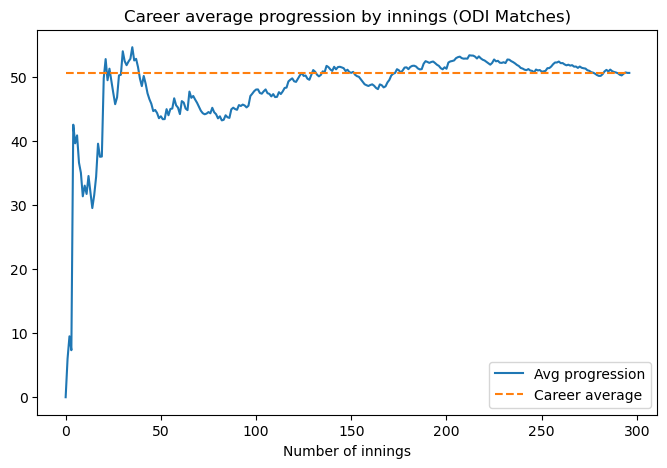

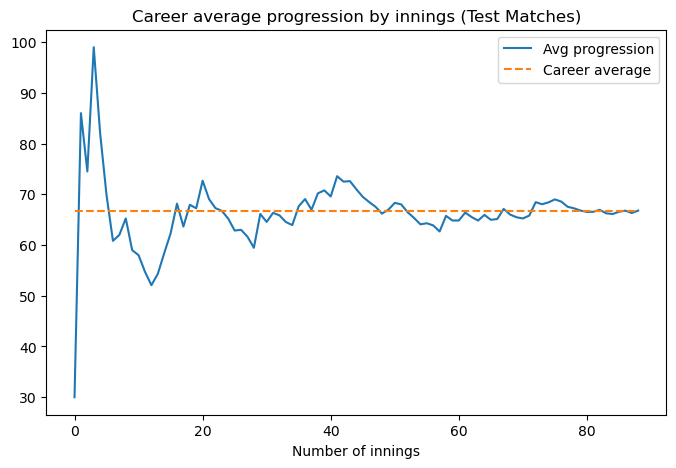

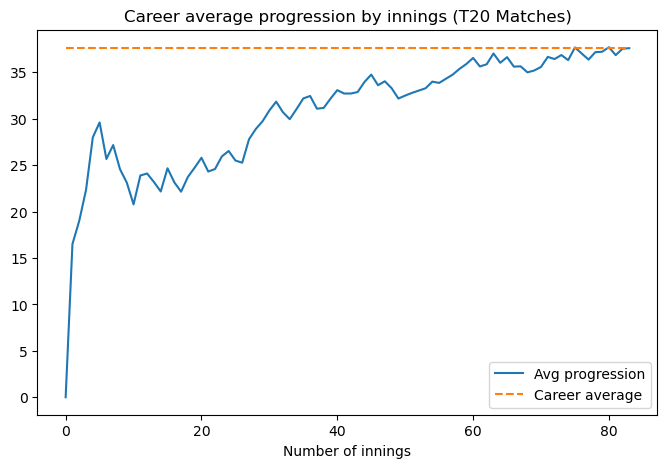

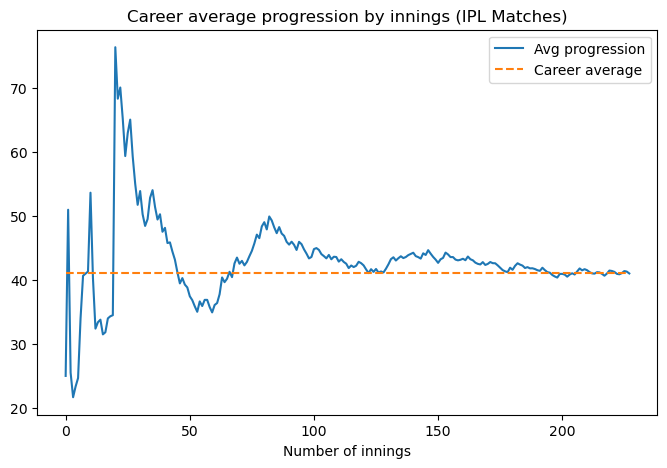

In [169]:
def save_and_show_plot(dataframe, title, filename):
    """Generate, save, and display a line plot for career average progression by innings."""
    plt.figure(figsize=(8, 5))
    
    career_avg = dataframe["average"].iloc[-1]  # Get the final career average
    plt.plot(dataframe["average"])
    plt.plot([career_avg] * dataframe.shape[0], "--")
    
    plt.title(title)
    plt.xlabel("Number of innings")
    plt.legend(["Avg progression", "Career average"])
    
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()  # Display the plot
    plt.close()


# Ensure the directory exists
output_dir = "build/Career Average Progression"
os.makedirs(output_dir, exist_ok=True)

# Generate, save, and show plots
save_and_show_plot(career_average_df1, "Career average progression by innings (ODI Matches)", "ODI_Career_Avg.png")
save_and_show_plot(career_average_df2, "Career average progression by innings (Test Matches)", "Test_Career_Avg.png")
save_and_show_plot(career_average_df3, "Career average progression by innings (T20 Matches)", "T20_Career_Avg.png")
save_and_show_plot(career_average_df4, "Career average progression by innings (IPL Matches)", "IPL_Career_Avg.png")


## 5. Regression Analysis: 

### 1. Impact of Balls Faced on Strike Rate

In [170]:
# For ODI Matches

# Convert Columns to Numeric (Handling Errors)
df1.loc[:, 'balls_faced'] = pd.to_numeric(df1['balls_faced'], errors='coerce')
df1.loc[:, 'strike_rate'] = pd.to_numeric(df1['strike_rate'], errors='coerce')

# Handle Missing Values (NaN)
df1 = df1.dropna(subset=['balls_faced', 'strike_rate']).copy()

# Running the Regression
X = df1[['balls_faced']]
y = df1['strike_rate']
model = LinearRegression()
model.fit(X, y)
print(f"Regression Coefficient (Balls_Faced -> Strike_Rate): {model.coef_[0]}")

# For Test Matches

# Convert Columns to Numeric (Handling Errors)
df2.loc[:, 'balls_faced'] = pd.to_numeric(df2['balls_faced'], errors='coerce')
df2.loc[:, 'strike_rate'] = pd.to_numeric(df2['strike_rate'], errors='coerce')

# Handle Missing Values (NaN)
df2 = df2.dropna(subset=['balls_faced', 'strike_rate']).copy()

# Running the Regression
X = df2[['balls_faced']]
y = df2['strike_rate']
model = LinearRegression()
model.fit(X, y)
print(f"Regression Coefficient (Balls_Faced -> Strike_Rate): {model.coef_[0]}")

# For T20 Matches

# Convert Columns to Numeric (Handling Errors)
df3.loc[:, 'balls_faced'] = pd.to_numeric(df3['balls_faced'], errors='coerce')
df3.loc[:, 'strike_rate'] = pd.to_numeric(df3['strike_rate'], errors='coerce')

# Handle Missing Values (NaN)
df3 = df3.dropna(subset=['balls_faced', 'strike_rate']).copy()

# Running the Regression
X = df3[['balls_faced']]
y = df3['strike_rate']
model = LinearRegression()
model.fit(X, y)
print(f"Regression Coefficient (Balls_Faced -> Strike_Rate): {model.coef_[0]}")

# For IPL Matches

# Convert Columns to Numeric (Handling Errors)
df4.loc[:, 'balls_faced'] = pd.to_numeric(df4['balls_faced'], errors='coerce')
df4.loc[:, 'strike_rate'] = pd.to_numeric(df4['strike_rate'], errors='coerce')

# Handle Missing Values (NaN)
df4 = df4.dropna(subset=['balls_faced', 'strike_rate']).copy()

# Running the Regression
X = df4[['balls_faced']]
y = df4['strike_rate']
model = LinearRegression()
model.fit(X, y)
print(f"Regression Coefficient (Balls_Faced -> Strike_Rate): {model.coef_[0]}")



Regression Coefficient (Balls_Faced -> Strike_Rate): -0.017073438802802474
Regression Coefficient (Balls_Faced -> Strike_Rate): 0.057584787065577264
Regression Coefficient (Balls_Faced -> Strike_Rate): -1.188637269413073
Regression Coefficient (Balls_Faced -> Strike_Rate): 0.8004152740494839


### 2. MS Dhoni's Batting Position Analysis

### Impact of Batting Position on Strike Rate

In [171]:
# For ODI Matches

# Convert Batting_Position to Categorical
df1['Batting_Position'] = df1['position'].astype('category').cat.codes

# Prepare the feature (Batting Position) and target variable (Strike Rate)
X_pos = df1[['Batting_Position']]
y = df1['strike_rate']

# Fit the model and get the coefficient
model.fit(X_pos, y)
print(f"Regression Coefficient (Batting Position -> Strike_Rate) for ODI Matches: {model.coef_[0]}")

# For Test Matches

# Convert Batting_Position to Categorical
df2['Batting_Position'] = df2['position'].astype('category').cat.codes

# Prepare the feature (Batting Position) and target variable (Strike Rate)
X_pos = df2[['Batting_Position']]
y = df2['strike_rate']

# Fit the model and get the coefficient
model.fit(X_pos, y)
print(f"Regression Coefficient (Batting Position -> Strike_Rate) for Test Matches: {model.coef_[0]}")

# For T20 Matches

# Convert Batting_Position to Categorical
df3['Batting_Position'] = df3['position'].astype('category').cat.codes

# Prepare the feature (Batting Position) and target variable (Strike Rate)
X_pos = df3[['Batting_Position']]
y = df3['strike_rate']

# Fit the model and get the coefficient
model.fit(X_pos, y)
print(f"Regression Coefficient (Batting Position -> Strike_Rate) for T20 Matches: {model.coef_[0]}")

# For IPL Matches

# Convert Batting_Position to Categorical
df4['Batting_Position'] = df4['position'].astype('category').cat.codes

# Prepare the feature (Batting Position) and target variable (Strike Rate)
X_pos = df4[['Batting_Position']]
y = df4['strike_rate']

# Fit the model and get the coefficient
model.fit(X_pos, y)
print(f"Regression Coefficient (Batting Position -> Strike_Rate) for IPL Matches: {model.coef_[0]}")



Regression Coefficient (Batting Position -> Strike_Rate) for ODI Matches: -1.741317758802647
Regression Coefficient (Batting Position -> Strike_Rate) for Test Matches: -7.906019076305217
Regression Coefficient (Batting Position -> Strike_Rate) for T20 Matches: 0.29408088235294005
Regression Coefficient (Batting Position -> Strike_Rate) for IPL Matches: 3.015069976340379


### Finding an Optimal Batting Position for M.S. Dhoni

Optimal Batting Position for Highest Runs in ODI Matches: 1
Optimal Batting Position for Highest Strike Rate in ODI Matches: 3


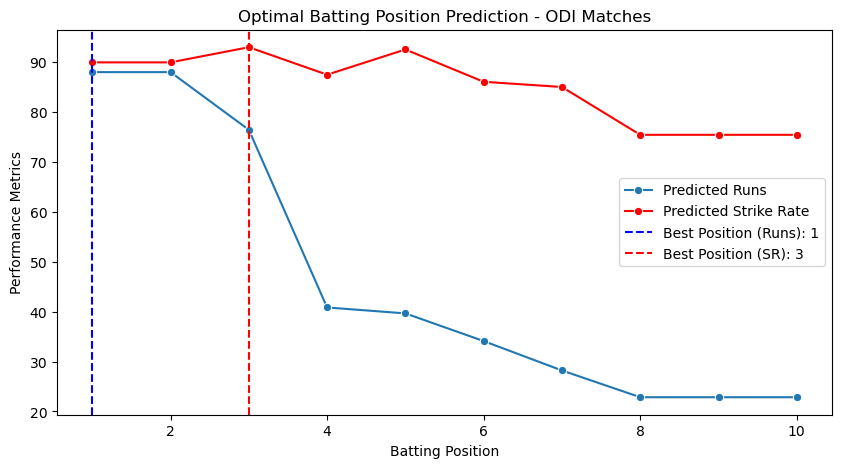

Optimal Batting Position for Highest Runs in Test Matches: 8
Optimal Batting Position for Highest Strike Rate in Test Matches: 1


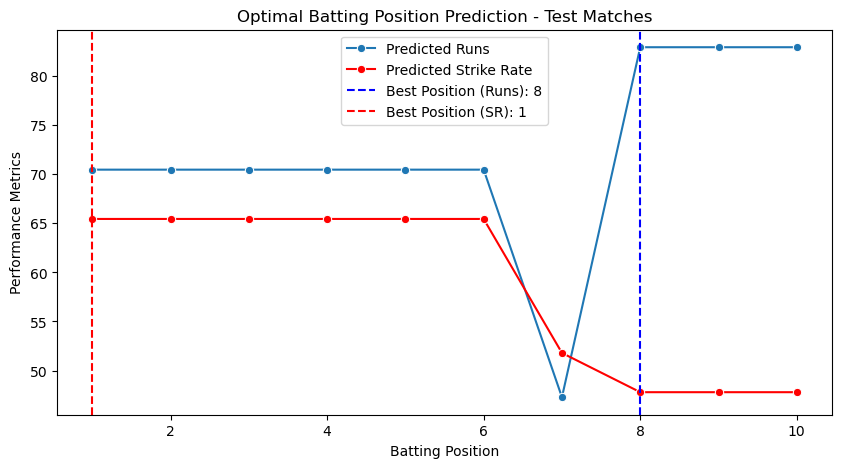

Optimal Batting Position for Highest Runs in T20 Matches: 4
Optimal Batting Position for Highest Strike Rate in T20 Matches: 7


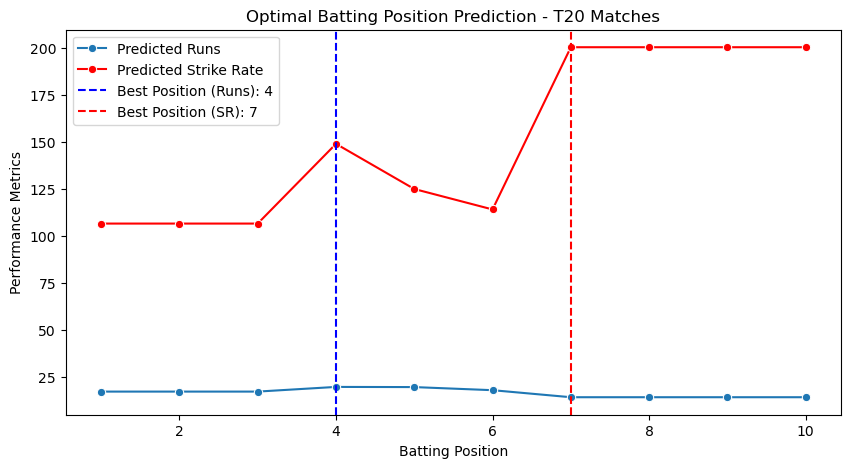

Optimal Batting Position for Highest Runs in IPL Matches: 8
Optimal Batting Position for Highest Strike Rate in IPL Matches: 8


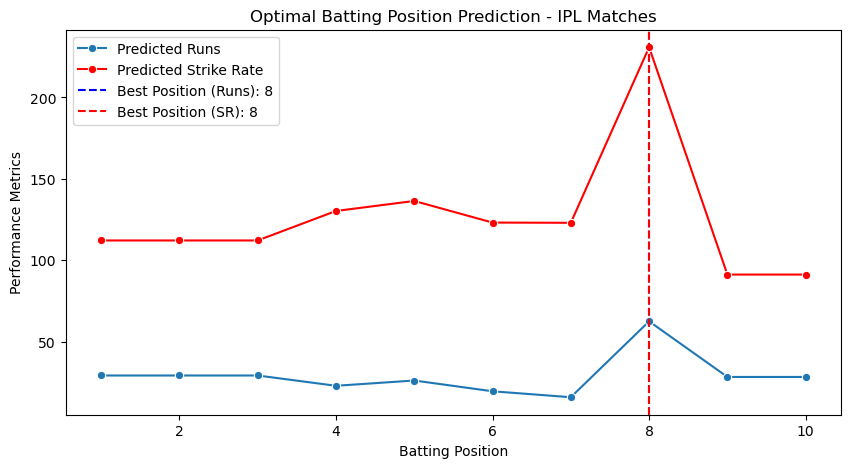

In [172]:
def find_optimal_batting_position(df, format_name):
    """Find and plot optimal batting position for highest runs and strike rate."""
    # Ensure batting position stays in its actual range (1-10)
    df['Batting_Position'] = df['position']

    # Features and Target
    X = df[['Batting_Position']]
    y_runs = df['runs_scored']
    y_sr = df['strike_rate']

    # Splitting data
    X_train, X_test, y_train_runs, y_test_runs = train_test_split(X, y_runs, test_size=0.2, random_state=42)
    X_train, X_test, y_train_sr, y_test_sr = train_test_split(X, y_sr, test_size=0.2, random_state=42)

    # Train models
    model_runs = RandomForestRegressor(n_estimators=100, random_state=42)
    model_sr = RandomForestRegressor(n_estimators=100, random_state=42)

    model_runs.fit(X_train, y_train_runs)
    model_sr.fit(X_train, y_train_sr)

    # Predict for positions 1 to 10 (Convert to DataFrame to avoid warning)
    positions = pd.DataFrame(np.arange(1, 11), columns=['Batting_Position'])
    predicted_runs = model_runs.predict(positions)
    predicted_sr = model_sr.predict(positions)

    # Find best position
    best_position_runs = positions.iloc[np.argmax(predicted_runs), 0]
    best_position_sr = positions.iloc[np.argmax(predicted_sr), 0]

    print(f"Optimal Batting Position for Highest Runs in {format_name}: {best_position_runs}")
    print(f"Optimal Batting Position for Highest Strike Rate in {format_name}: {best_position_sr}")

    # Plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=positions['Batting_Position'], y=predicted_runs, label="Predicted Runs", marker="o")
    sns.lineplot(x=positions['Batting_Position'], y=predicted_sr, label="Predicted Strike Rate", marker="o", color="red")
    plt.axvline(x=best_position_runs, linestyle="--", color="blue", label=f"Best Position (Runs): {best_position_runs}")
    plt.axvline(x=best_position_sr, linestyle="--", color="red", label=f"Best Position (SR): {best_position_sr}")
    plt.xlabel("Batting Position")
    plt.ylabel("Performance Metrics")
    plt.title(f"Optimal Batting Position Prediction - {format_name}")
    plt.legend()

    # Save and show the plot
    output_dir = "build/Best Batting Position"
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, f"{format_name.replace(' ', '_')}_Best_Batting_Position.png")
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    plt.close()


# Run the function for different formats
find_optimal_batting_position(df1, "ODI Matches")
find_optimal_batting_position(df2, "Test Matches")
find_optimal_batting_position(df3, "T20 Matches")
find_optimal_batting_position(df4, "IPL Matches")

### 3. Moving Average for Strike Rate Trends

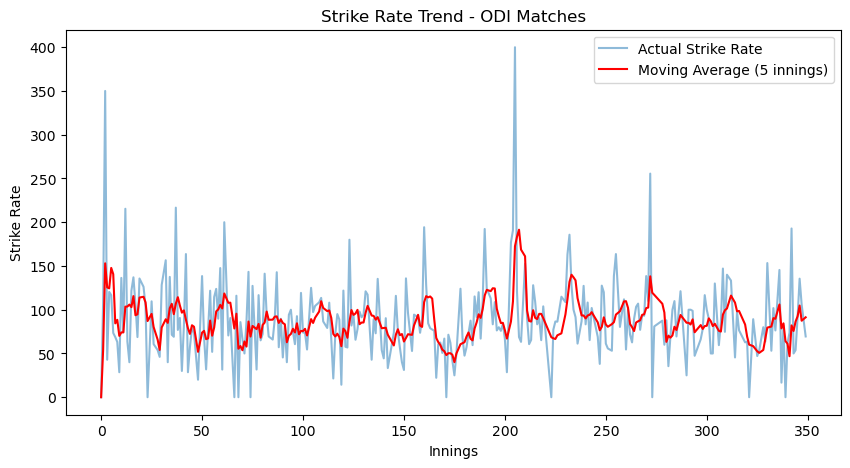

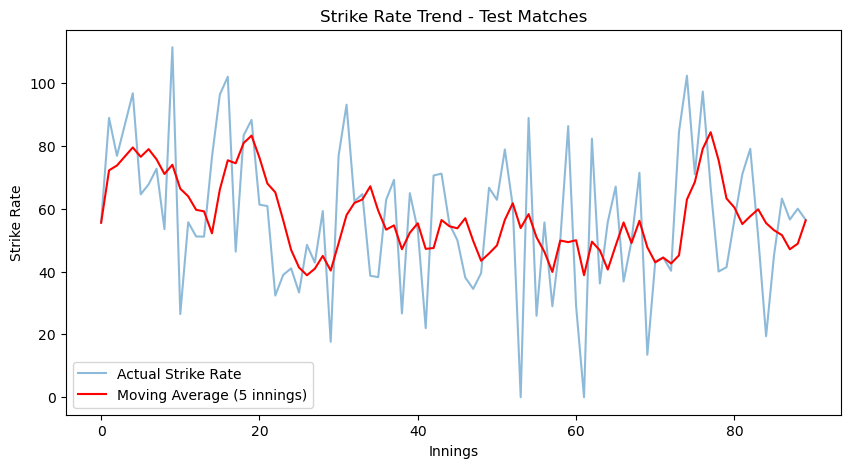

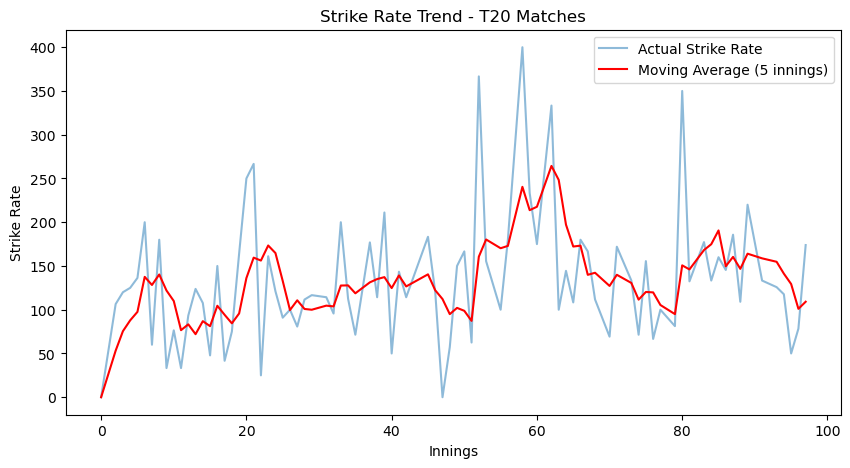

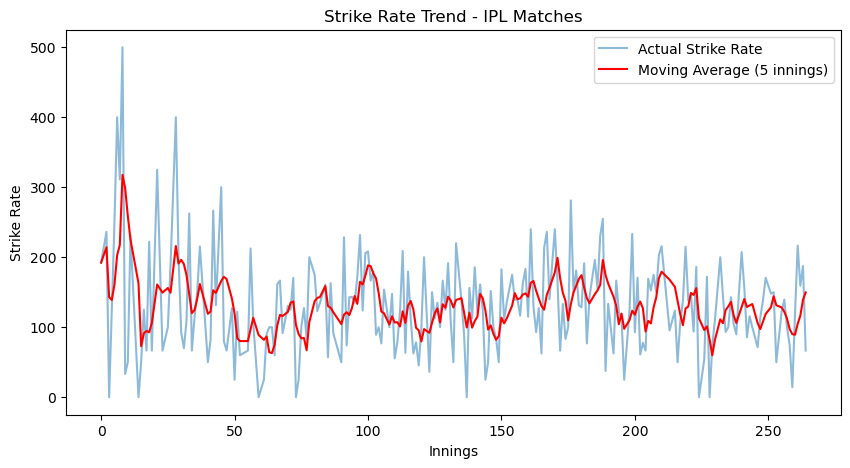

In [173]:
def plot_strike_rate_trend(df, format_name):
    """Calculate and plot the moving average for strike rate in different match formats."""
    # Calculate the Moving Average (5 innings)
    df['Strike_Rate_MA'] = df['strike_rate'].rolling(window=5, min_periods=1).mean()

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['strike_rate'], label='Actual Strike Rate', alpha=0.5)
    plt.plot(df.index, df['Strike_Rate_MA'], label='Moving Average (5 innings)', color='red')
    plt.legend()
    plt.title(f'Strike Rate Trend - {format_name}')
    plt.xlabel('Innings')
    plt.ylabel('Strike Rate')

    # Save and show the plot
    output_dir = "build/Strike Rate Moving Average"
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, f"{format_name.replace(' ', '_')}_Strike_Rate_Trend.png")
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    plt.close()


# Run the function for different formats
plot_strike_rate_trend(df1, "ODI Matches")
plot_strike_rate_trend(df2, "Test Matches")
plot_strike_rate_trend(df3, "T20 Matches")
plot_strike_rate_trend(df4, "IPL Matches")


### 4. Clustering: Identifying Aggressive vs. Defensive Innings

c:\Users\USER\miniforge3\envs\eppp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


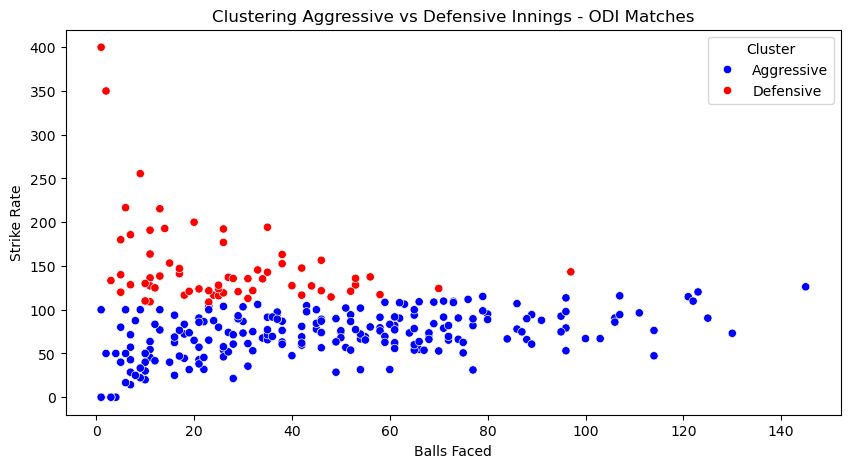

c:\Users\USER\miniforge3\envs\eppp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


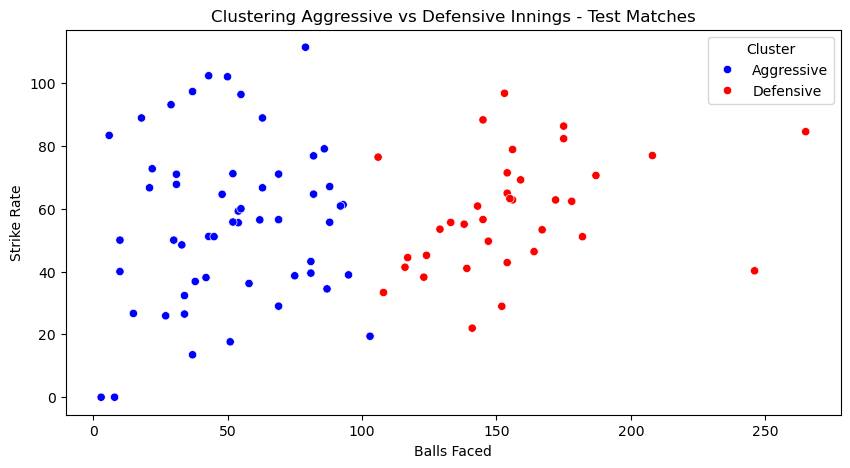

c:\Users\USER\miniforge3\envs\eppp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


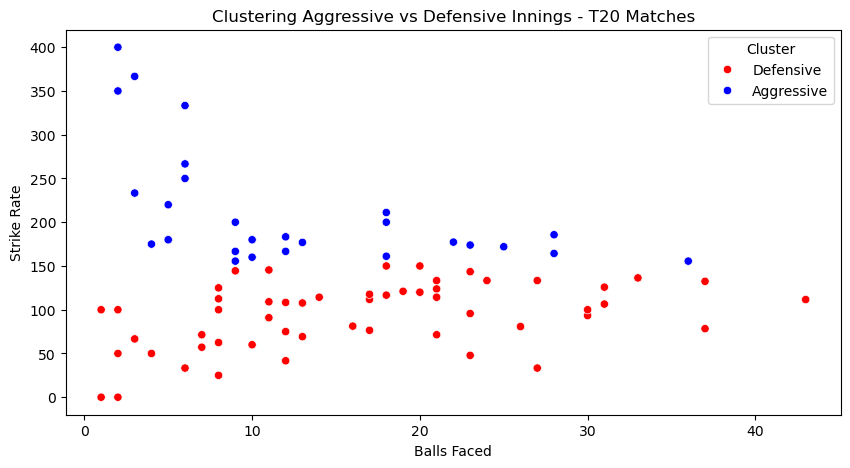

c:\Users\USER\miniforge3\envs\eppp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


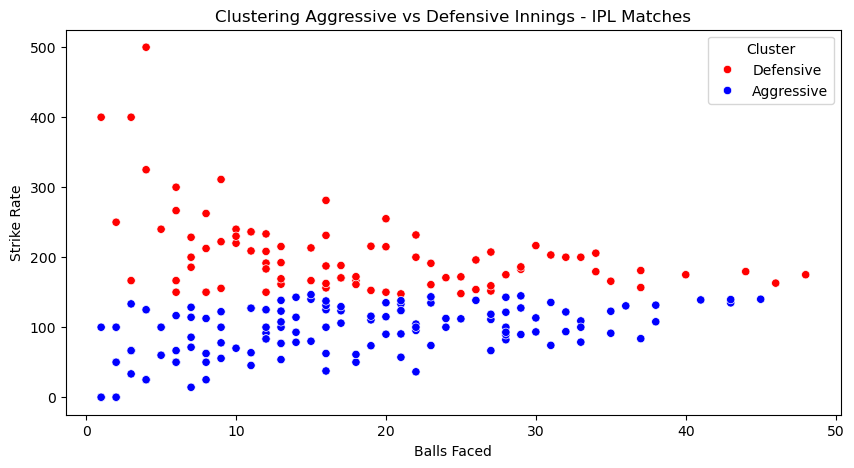

In [174]:
def cluster_and_plot(df, format_name):
    """Perform KMeans clustering and plot the results for Aggressive vs Defensive innings."""
    
    # Perform KMeans clustering (2 clusters: Aggressive and Defensive)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(df[['strike_rate', 'balls_faced']])

    # Map Cluster 0 to 'Aggressive' and Cluster 1 to 'Defensive'
    df['Cluster_Label'] = df['Cluster'].map({0: 'Aggressive', 1: 'Defensive'})

    # Plotting
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['balls_faced'], y=df['strike_rate'], hue=df['Cluster_Label'], 
                    palette={'Aggressive': 'blue', 'Defensive': 'red'})
    plt.title(f'Clustering Aggressive vs Defensive Innings - {format_name}')
    plt.xlabel('Balls Faced')
    plt.ylabel('Strike Rate')
    plt.legend(title='Cluster')

    # Save and show the plot
    output_dir = "build/Clustering Aggressive vs Defensive Innings"
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, f"{format_name.replace(' ', '_')}_Clustering.png")
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    plt.close()

# Run the function for different formats
cluster_and_plot(df1, "ODI Matches")
cluster_and_plot(df2, "Test Matches")
cluster_and_plot(df3, "T20 Matches")
cluster_and_plot(df4, "IPL Matches")


### 5. Data Processing and Visualizing Boundary Percentage

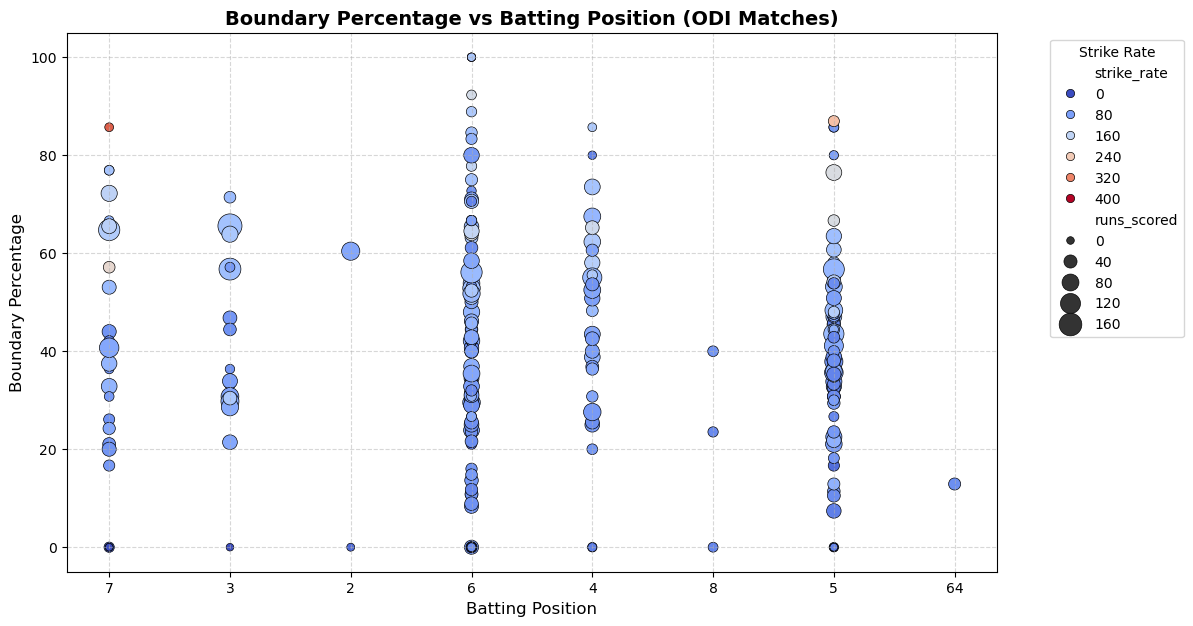

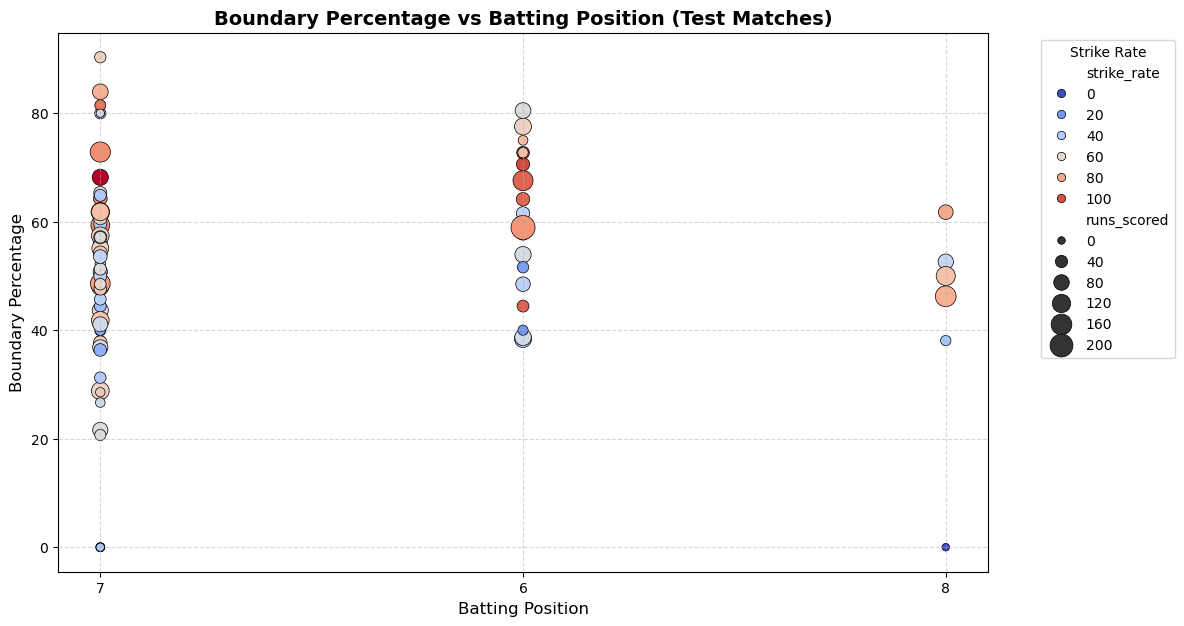

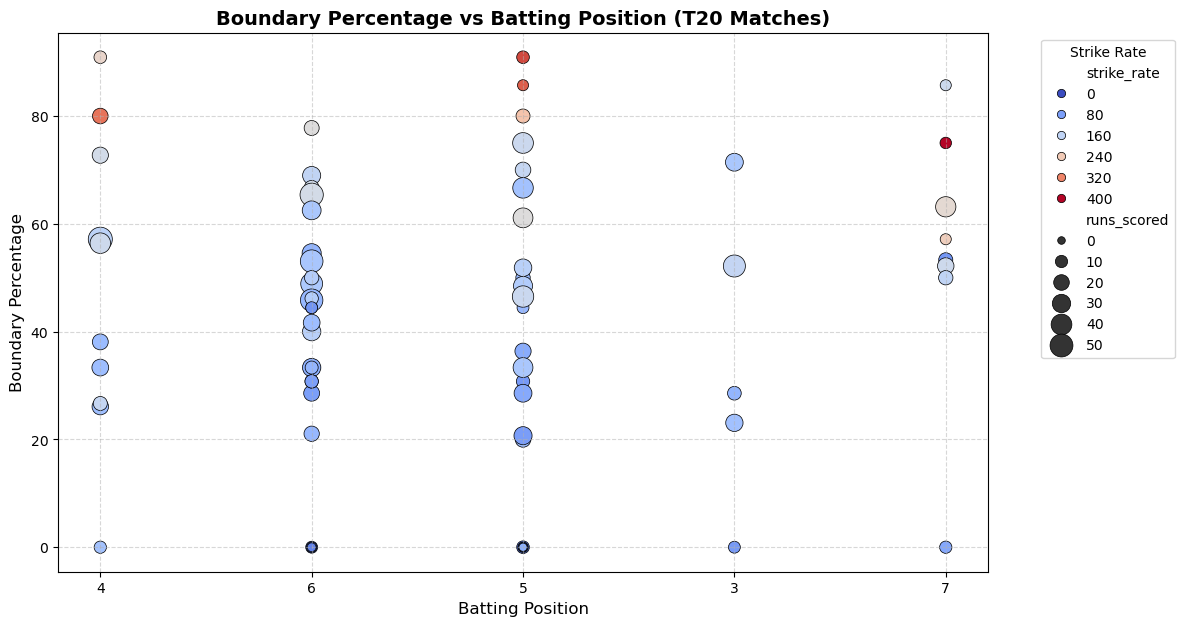

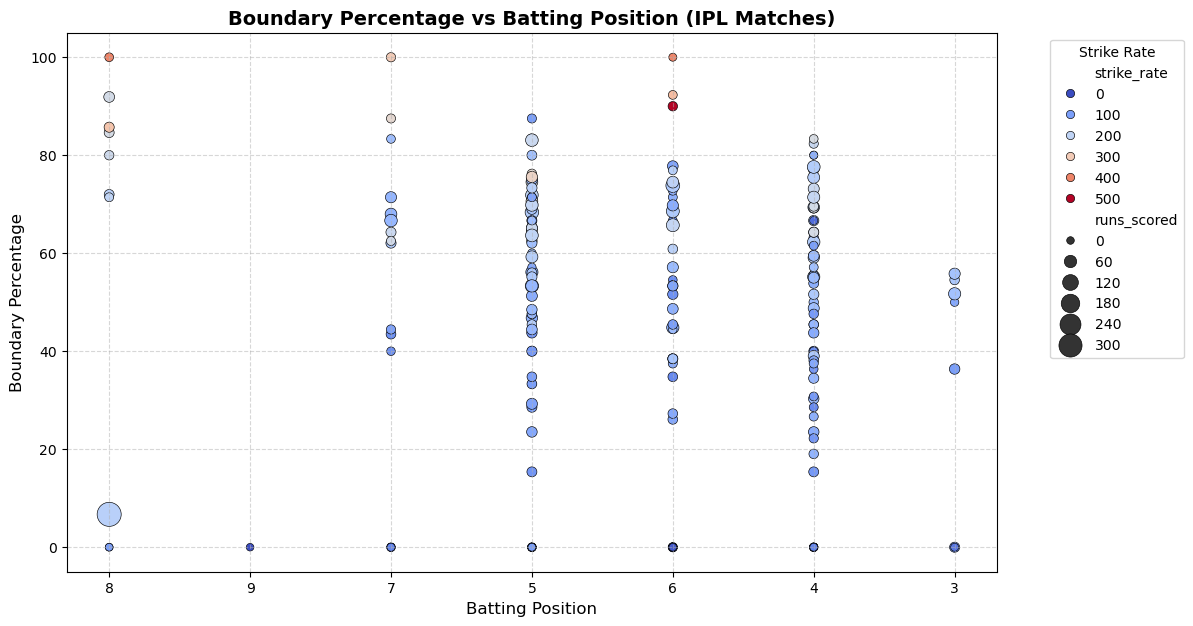


Correlation between Boundary Percentage and Batting Position (ODI Matches):
                     boundary_percentage  position
boundary_percentage             1.000000 -0.083586
position                       -0.083586  1.000000


Correlation between Boundary Percentage and Batting Position (Test Matches):
                     boundary_percentage  position
boundary_percentage             1.000000 -0.240344
position                       -0.240344  1.000000


Correlation between Boundary Percentage and Batting Position (T20 Matches):
                     boundary_percentage  position
boundary_percentage               1.0000    0.0396
position                          0.0396    1.0000


Correlation between Boundary Percentage and Batting Position (IPL Matches):
                     boundary_percentage  position
boundary_percentage             1.000000 -0.010463
position                       -0.010463  1.000000



In [175]:
def calculate_boundary_percentage(df):
    """
    Calculate boundary percentage for each row in the DataFrame.
    Formula: ((fours * 4 + sixes * 6) / runs_scored) * 100
    """
    df["boundary_percentage"] = ((df["fours"] * 4 + df["sixes"] * 6) / df["runs_scored"]) * 100
    df["boundary_percentage"] = df["boundary_percentage"].fillna(0)  # Handling division by zero cases
    return df

# Apply function to all datasets
df1_new = calculate_boundary_percentage(df1_new)
df2_new = calculate_boundary_percentage(df2_new)
df3_new = calculate_boundary_percentage(df3_new)
df4_new = calculate_boundary_percentage(df4_new)

def plot_boundary_percentage_vs_batting_position(df, format_name):
    """
    Scatterplot of Boundary Percentage vs Batting Position,
    colored by Strike Rate and sized by Runs Scored.
    """
    plt.figure(figsize=(12, 7))
    scatter = sns.scatterplot(
        x="position", y="boundary_percentage", hue="strike_rate",
        palette="coolwarm", size="runs_scored", sizes=(30, 300),
        edgecolor="black", data=df
    )
    plt.title(f"Boundary Percentage vs Batting Position ({format_name})", fontsize=14, fontweight="bold")
    plt.xlabel("Batting Position", fontsize=12)
    plt.ylabel("Boundary Percentage", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Strike Rate", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.5)

    # Save plot to the specified directory
    output_dir = "build/Boundary_Percentage_Plots"
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, f"{format_name.replace(' ', '_')}_Boundary_Percentage.png")
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    plt.close()

# Plot for each format
plot_boundary_percentage_vs_batting_position(df1_new, "ODI Matches")
plot_boundary_percentage_vs_batting_position(df2_new, "Test Matches")
plot_boundary_percentage_vs_batting_position(df3_new, "T20 Matches")
plot_boundary_percentage_vs_batting_position(df4_new, "IPL Matches")

def analyze_correlation(df, format_name):
    """
    Compute and print correlation between Boundary Percentage and Batting Position.
    """
    correlation = df[["boundary_percentage", "position"]].corr()
    print(f"\nCorrelation between Boundary Percentage and Batting Position ({format_name}):\n{correlation}\n")

# Correlation analysis
analyze_correlation(df1_new, "ODI Matches")
analyze_correlation(df2_new, "Test Matches")
analyze_correlation(df3_new, "T20 Matches")
analyze_correlation(df4_new, "IPL Matches")


### 6. Analyzing Performance and Visualizing Averages


Average Performance by Batting Position (ODI Matches):
  position  avg_boundary_percentage  avg_strike_rate   avg_runs
0        2                30.208333        59.565000  49.000000
1        3                40.664395        89.398125  62.062500
2        4                44.404459        93.543103  45.758621
3        5                38.409596        91.433012  38.180723
4        6                39.892959        86.027132  32.279070
5       64                12.903226        63.260000  31.000000
6        7                30.330866        85.889706  27.647059
7        8                21.176471        61.990000  17.000000


Average Performance by Batting Position (Test Matches):
  position  avg_boundary_percentage  avg_strike_rate   avg_runs
0        6                59.711470        64.969444  71.833333
1        7                47.850613        55.230462  48.092308
2        8                41.456920        51.516667  76.166667


Average Performance by Batting Position (T20 Matches

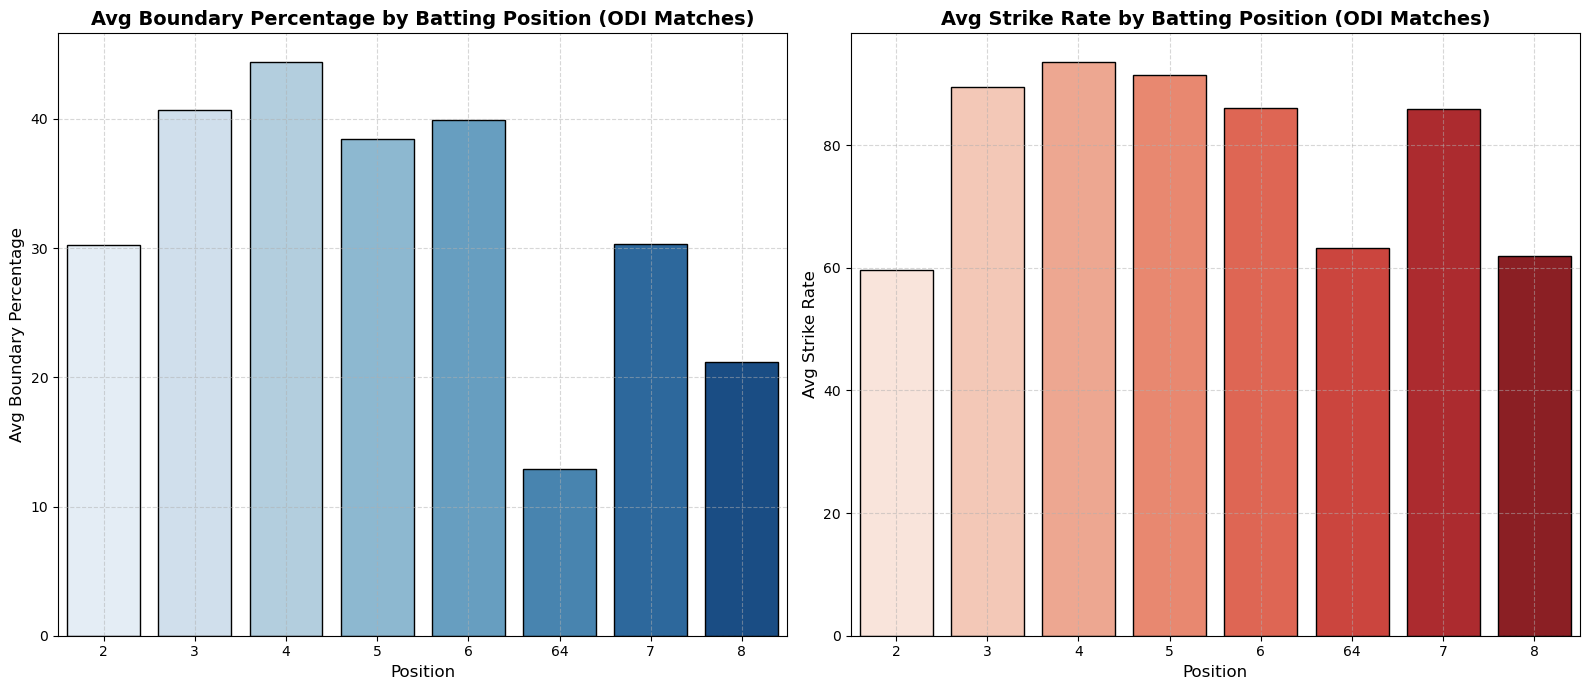

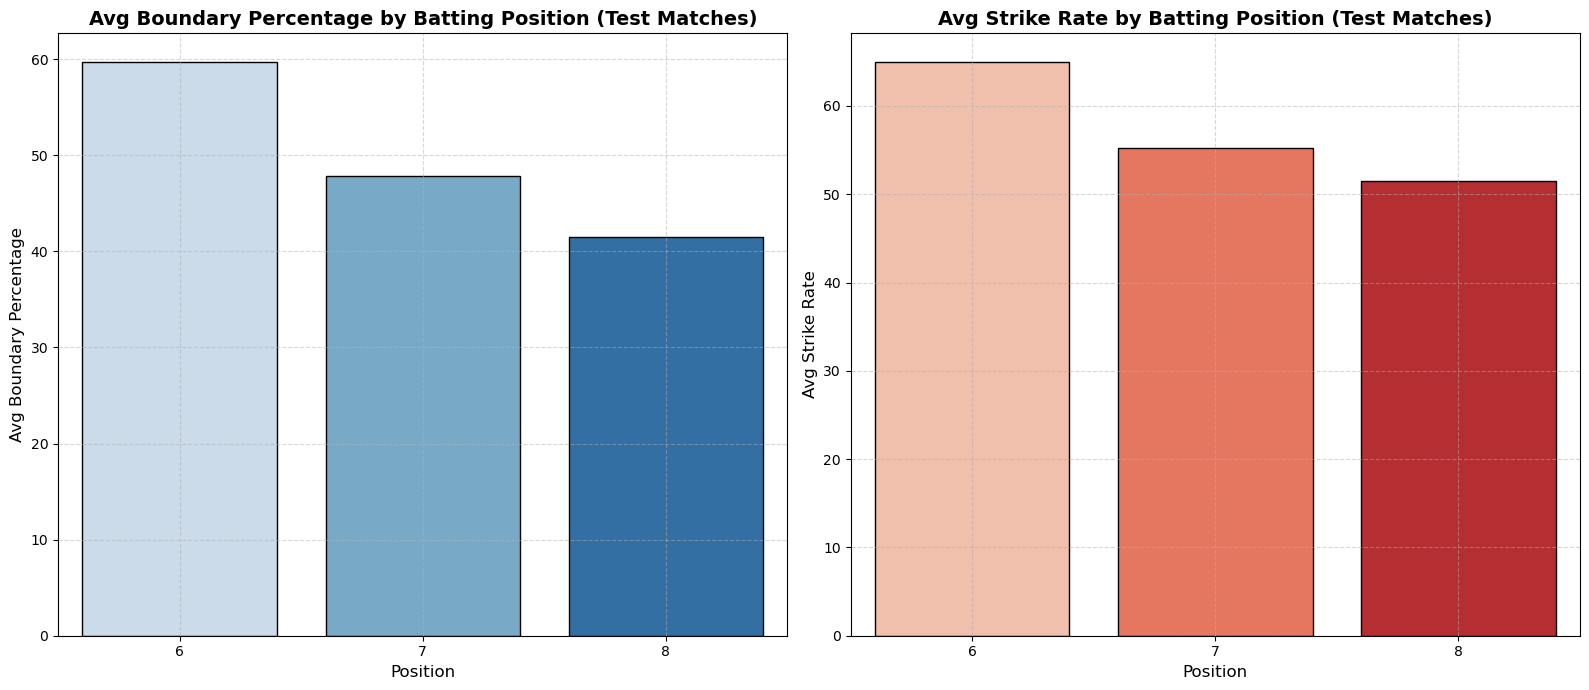

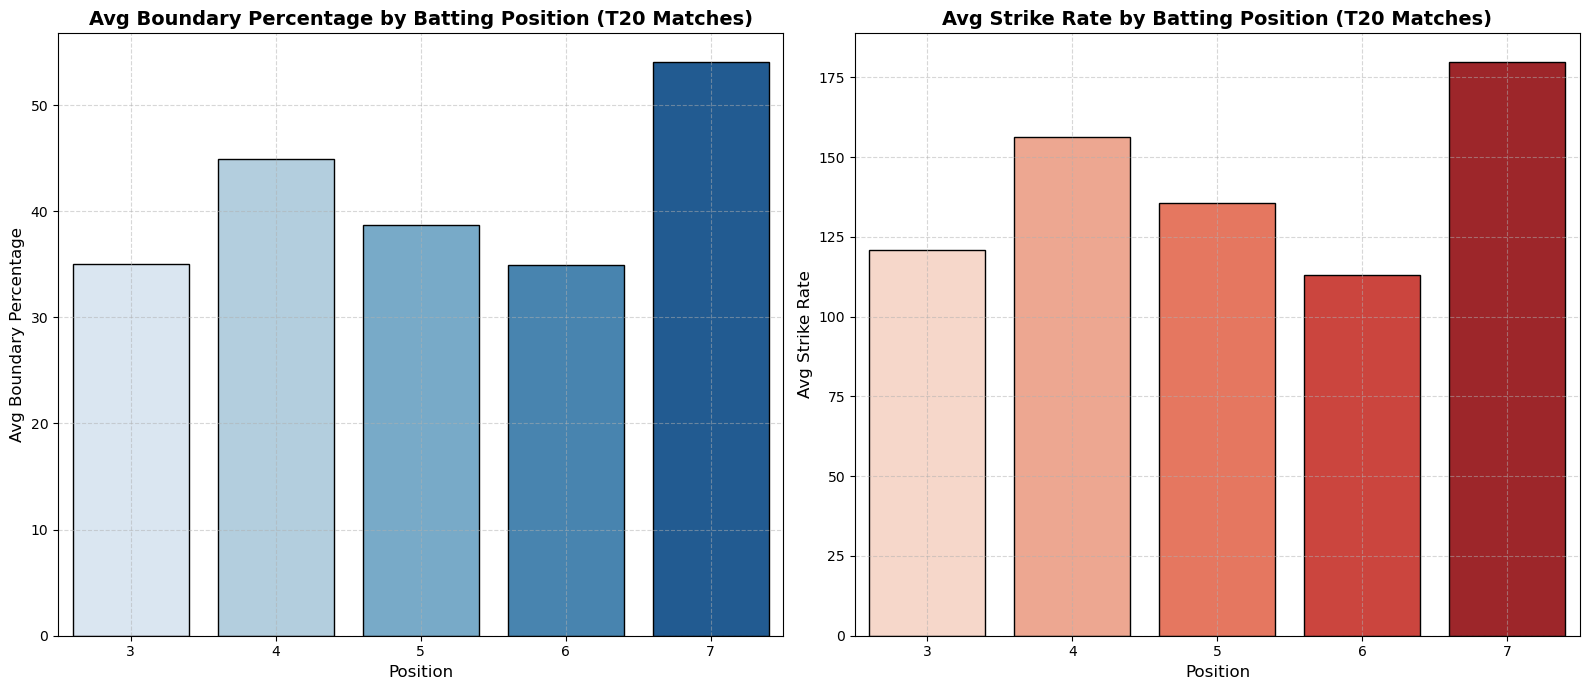

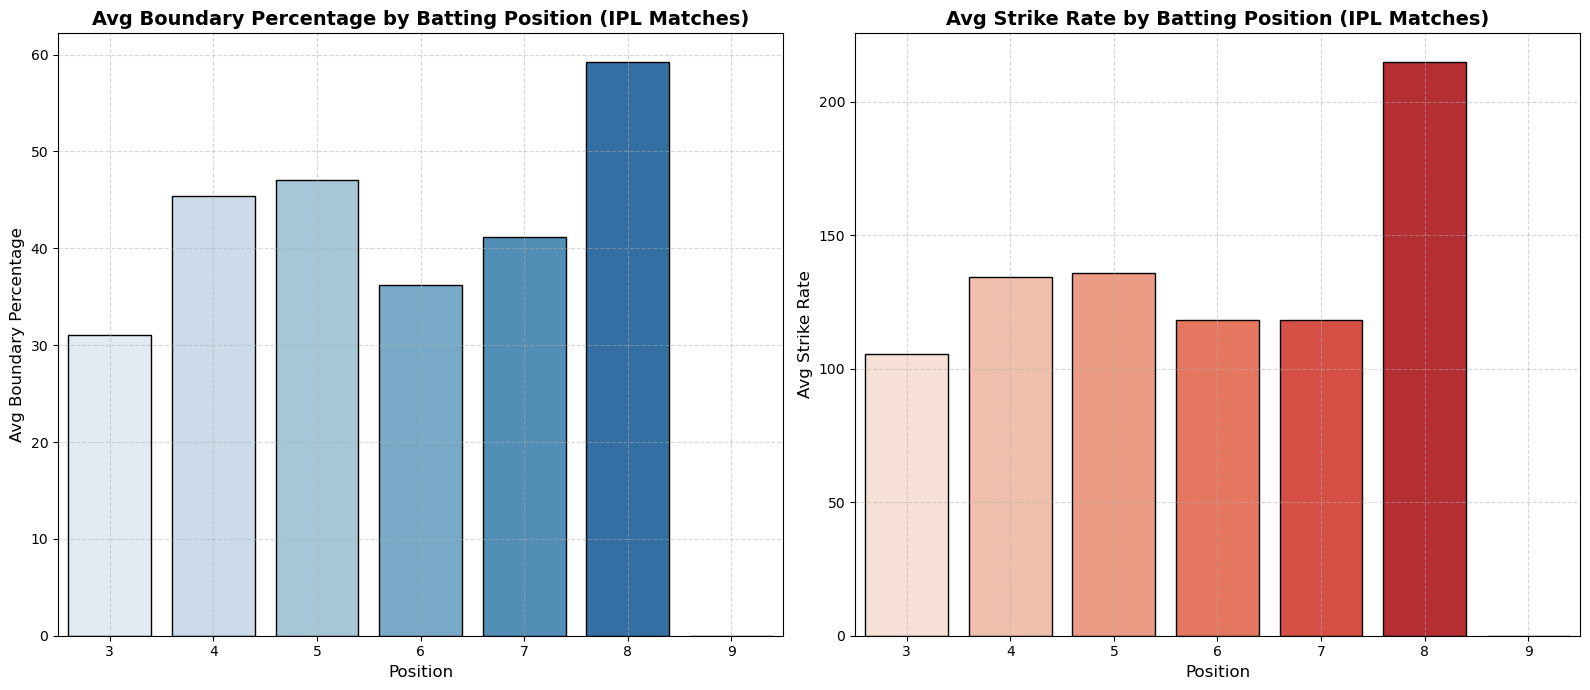


Overall Averages Across All Formats:
   Format  avg_boundary_percentage  avg_strike_rate   avg_runs
0    IPL                43.407895       131.633333  24.293860
1    ODI                38.520695        87.939966  36.272727
2    T20                39.579813       133.793452  19.250000
3   Test                49.818403        56.949775  54.786517


In [176]:
def analyze_avg_performance(df, format_name):
    """
    Compute average boundary percentage, strike rate, and runs scored
    grouped by batting position.
    """
    avg_performance = df.groupby("position").agg(
        avg_boundary_percentage=("boundary_percentage", "mean"),
        avg_strike_rate=("strike_rate", "mean"),
        avg_runs=("runs_scored", "mean")
    ).reset_index()

    print(f"\nAverage Performance by Batting Position ({format_name}):\n{avg_performance}\n")
    return avg_performance

# Compute averages for each format
avg_performance_odi = analyze_avg_performance(df1_new, "ODI Matches")
avg_performance_test = analyze_avg_performance(df2_new, "Test Matches")
avg_performance_t20 = analyze_avg_performance(df3_new, "T20 Matches")
avg_performance_ipl = analyze_avg_performance(df4_new, "IPL Matches")

def plot_avg_performance(avg_performance, format_name):
    """
    Bar plots of average boundary percentage and strike rate by batting position.
    """
    fig, ax = plt.subplots(1, 2, figsize=(16, 7))

    # Bar plot for avg_boundary_percentage
    sns.barplot(x="position", y="avg_boundary_percentage", hue="position", data=avg_performance,
                ax=ax[0], palette="Blues", edgecolor="black", legend=False)
    ax[0].set_title(f"Avg Boundary Percentage by Batting Position ({format_name})", fontsize=14, fontweight="bold")
    ax[0].set_xlabel("Position", fontsize=12)
    ax[0].set_ylabel("Avg Boundary Percentage", fontsize=12)
    ax[0].grid(True, linestyle="--", alpha=0.5)

    # Bar plot for avg_strike_rate
    sns.barplot(x="position", y="avg_strike_rate", hue="position", data=avg_performance,
                ax=ax[1], palette="Reds", edgecolor="black", legend=False)
    ax[1].set_title(f"Avg Strike Rate by Batting Position ({format_name})", fontsize=14, fontweight="bold")
    ax[1].set_xlabel("Position", fontsize=12)
    ax[1].set_ylabel("Avg Strike Rate", fontsize=12)
    ax[1].grid(True, linestyle="--", alpha=0.5)

    plt.tight_layout()

    # Save plot to the specified directory
    output_dir = "build/Average_Performance_Plots"
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, f"{format_name.replace(' ', '_')}_Avg_Performance.png")
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    plt.close()

# Plot for each format
plot_avg_performance(avg_performance_odi, "ODI Matches")
plot_avg_performance(avg_performance_test, "Test Matches")
plot_avg_performance(avg_performance_t20, "T20 Matches")
plot_avg_performance(avg_performance_ipl, "IPL Matches")

def calculate_overall_average(df1, df2, df3, df4):
    """
    Combine all formats into one DataFrame, compute overall averages for
    boundary percentage, strike rate, and runs scored.
    """
    df_combined = pd.concat([df1, df2, df3, df4], keys=["ODI", "Test", "T20", "IPL"]).reset_index(level=0)
    df_combined.rename(columns={"level_0": "Format"}, inplace=True)

    overall_avg = df_combined.groupby("Format").agg(
        avg_boundary_percentage=("boundary_percentage", "mean"),
        avg_strike_rate=("strike_rate", "mean"),
        avg_runs=("runs_scored", "mean")
    ).reset_index()

    print("\nOverall Averages Across All Formats:\n", overall_avg)

# Compute overall averages
calculate_overall_average(df1_new, df2_new, df3_new, df4_new)
